In [1]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(data,
                    s = 75,
                    figsize = (40, 20),
                    save_fig = False,
                    pp = None):
    df = data.copy()
    for var1 in df:
        for var2 in df:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1,
                                y = var2,
                                s = s,
                                ax = ax, 
                                c = "Year",
                                cmap = "viridis")
                ax.tick_params(axis='x', 
                               rotation=45)
                ax.tick_params('both', 
                               length=0, 
                               which='both')
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(list(df.keys())).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

In [2]:
!pip install pandas-datareader --user

In [3]:
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, 
                start, 
                end = datetime.datetime.today(), 
                freq = "M"):
    i = 0
    for key, val in data_codes.items():
        if i == 0:
            df = web.DataReader(
                val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key},
                      inplace = True)
            i = None
        else:
            df[key] = web.DataReader(val, 
                                     "fred",start, end).resample(freq).mean()

    return df

In [4]:
from datlib.plots import * 
from datlib.FRED import *
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "WCURCIR"}
start = datetime.datetime(2000, 
                          1,
                          1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "M")

In [5]:
data.iloc[:20]

,Base: Total,Base: Currency in Circulation
DATE,,
2000-01-31,607904.50,594.67875
2000-02-29,578238.00,566.14375
2000-03-31,577082.60,563.70500
2000-04-30,578438.75,564.73350
2000-05-31,580386.00,565.83560
2000-06-30,581639.00,568.33300
2000-07-31,584574.00,571.21600
2000-08-31,583349.60,569.31340
2000-09-30,583864.25,570.67700


In [6]:
def bil_to_mil(series):
    return series* 10**3

In [7]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
               
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end,
                   freq = "M")
bil_to_mil_list  = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)",
                    "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [8]:
data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: Deposits from Dep. Institutions ($ Mil),Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil)
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-31,601900.0,594678.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,408.50,NaN,5.500000,NaN,5.448387,NaN,72445.0,39.064
2000-02-29,578000.0,566143.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,243.00,NaN,5.741379,NaN,5.734828,NaN,69823.5,37.022
2000-03-31,577100.0,563705.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,209.40,NaN,5.838710,NaN,5.853548,NaN,49108.4,33.233
2000-04-30,578600.0,564733.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,267.50,NaN,6.000000,NaN,6.019667,NaN,46876.0,33.508
2000-05-31,580600.0,565835.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,250.60,NaN,6.258065,NaN,6.268065,NaN,44636.4,33.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,6042100.0,2154819.25,7775974.00,7614925.00,7207246.25,4986900.00,2347.0,2217999.25,0.00,759.75,...,3884245.25,953095.75,372836.75,5255878.75,NaN,0.25,0.069000,0.100000,NaN,NaN
2021-05-31,6041900.0,2167934.00,7866893.25,7709974.25,7291913.75,5063447.75,2347.0,2226119.00,11.75,642.50,...,3883067.75,862533.00,380029.00,5142879.50,NaN,0.25,0.058065,0.100000,NaN,NaN
2021-06-30,6027100.0,2178871.20,8026555.20,7874851.20,7450341.40,5149903.00,2347.0,2298091.20,0.00,516.00,...,3789613.40,767312.40,332965.60,4906226.60,NaN,0.25,0.078000,0.123333,NaN,NaN


In [9]:
from matplotlib.backends.backend_pdf import PdfPages
def plot_lines(df, 
               linewidth = 1, 
               figsize = (40,20),
               secondary_y = None, 
               legend=True, 
               pp = None, 
               save_fig = False):
    
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth, 
        ax = ax, 
        secondary_y=secondary_y, 
        legend = legend)
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params('both', length=0, which='both')
    vals = ax.get_yticks()
    ax.set_yticklabels([round(x,2) for x in vals]) 
    
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")  
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        plt.savefig("plots/" + filename[:50] + " line.png", 
                bbox_inches = "tight")
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

<ipython-input-9-7887ab94efe1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


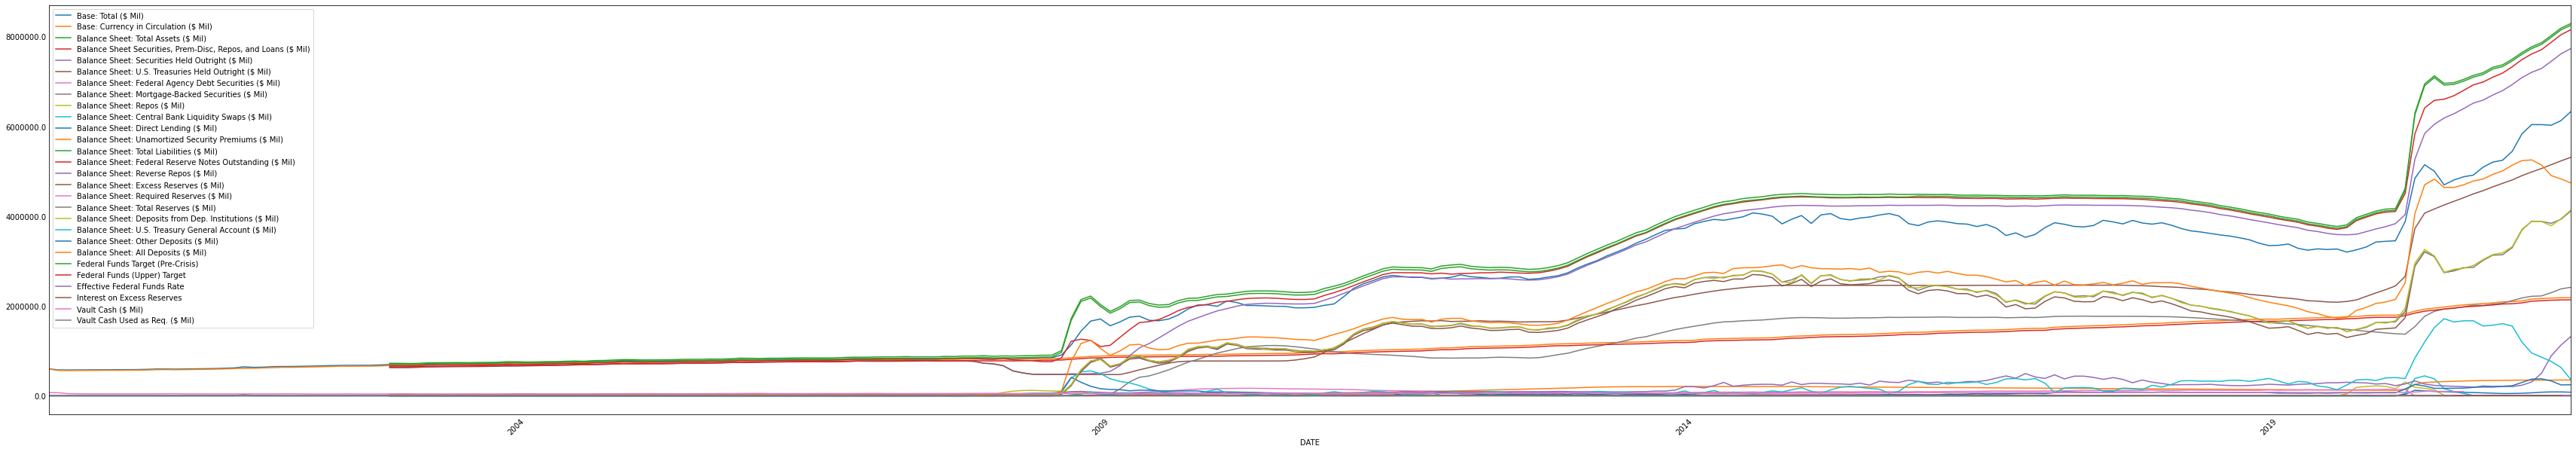

In [10]:
plot_lines(df = data, 
           linewidth = 1.5, 
           figsize = (60, 10), 
           pp = None)

<ipython-input-9-7887ab94efe1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


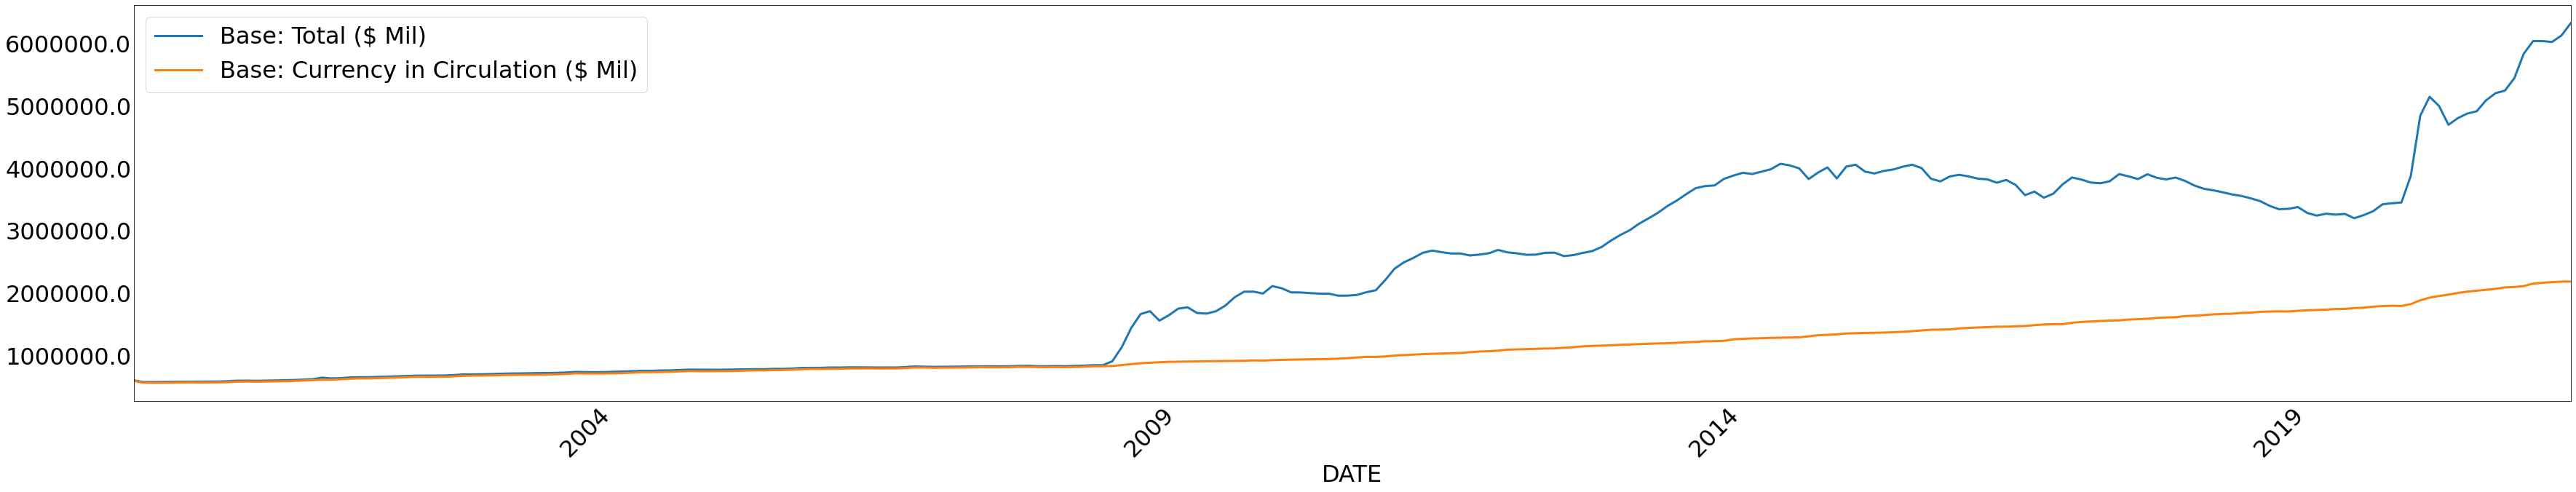

In [11]:
plt.rcParams.update({"font.size":32})
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)"]
plot_lines(df = data[money_vars], 
           linewidth = 3, 
           figsize = (60, 10), 
           pp = None)

<ipython-input-9-7887ab94efe1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


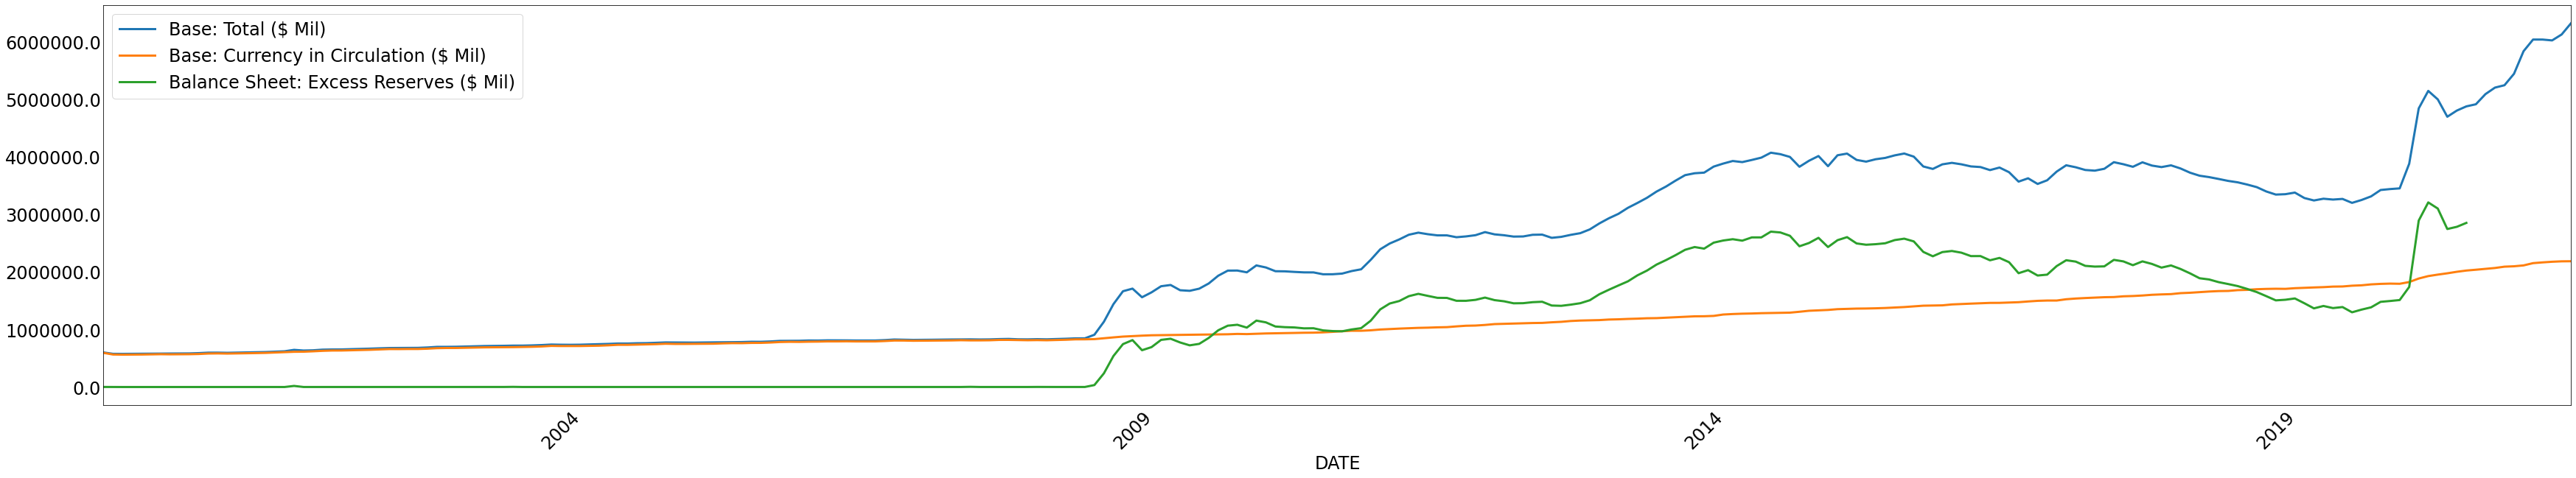

In [12]:
plt.rcParams.update({"font.size":24})
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
plot_lines(df = data[money_vars], 
           linewidth = 3, 
           figsize = (60, 10),
           pp = None)

In [13]:
def plot_stacked_lines(df, 
                       plot_vars, 
                       linewidth = 1, 
                       figsize = (60,10), 
                       pp = None, 
                       total_var = False):
    fig, ax = plt.subplots(figsize = figsize)
    df[plot_vars].plot.area(stacked = True, 
                            linewidth = linewidth,
                            ax = ax)
    
    if total_var != False:
        df[total_var].plot.line(
            linewidth = linewidth, 
            ax = ax, 
            c = "green",
            label = total_var, 
            ls = "--")
    ax.legend(loc=2, 
              ncol = 1)

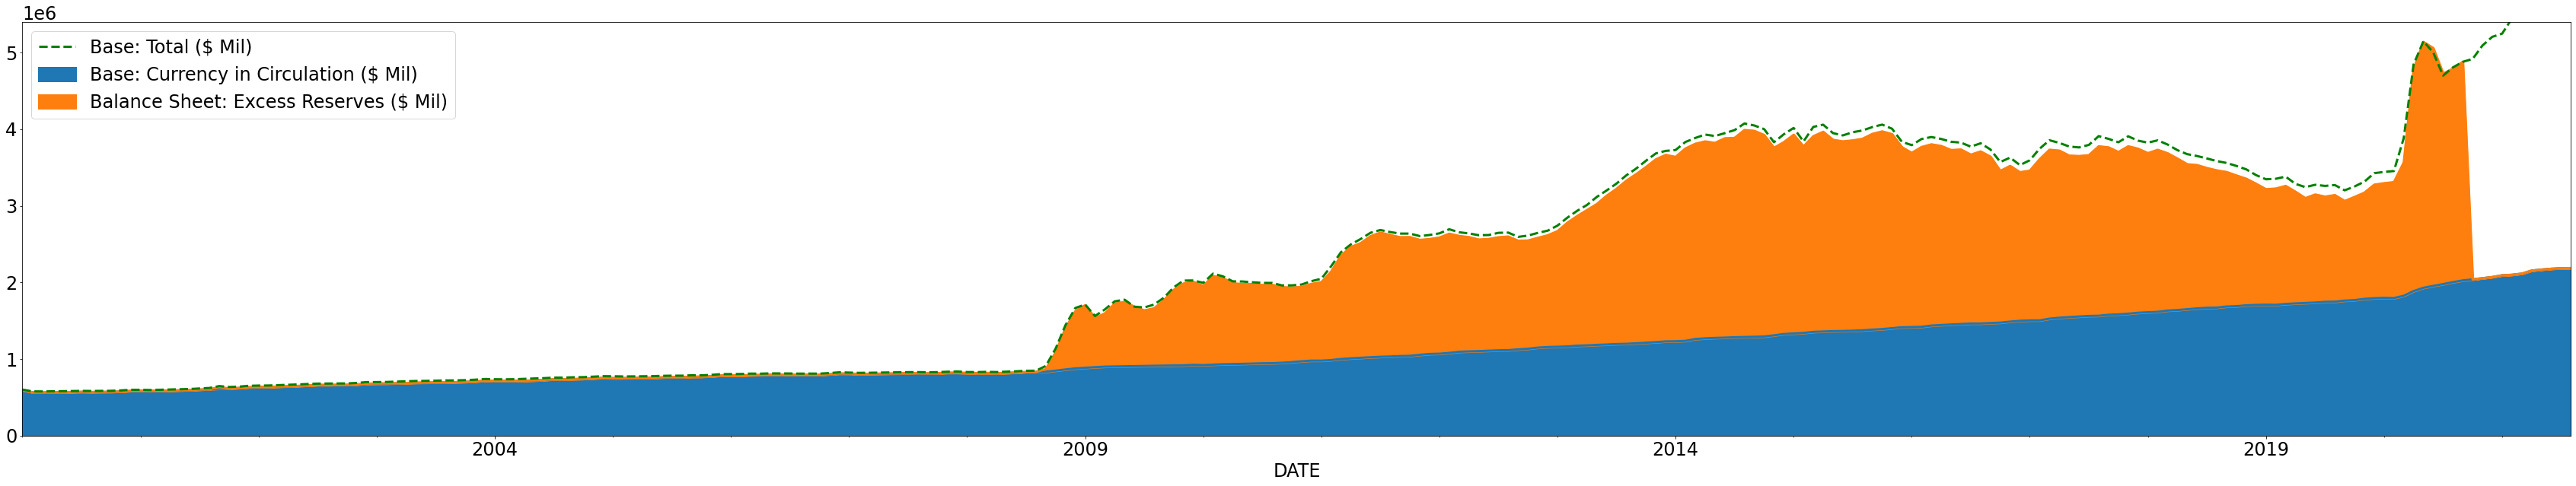

In [14]:
money_vars = ["Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]

plot_stacked_lines(data, 
                   money_vars, 
                   linewidth = 3,
                   total_var = "Base: Total ($ Mil)")

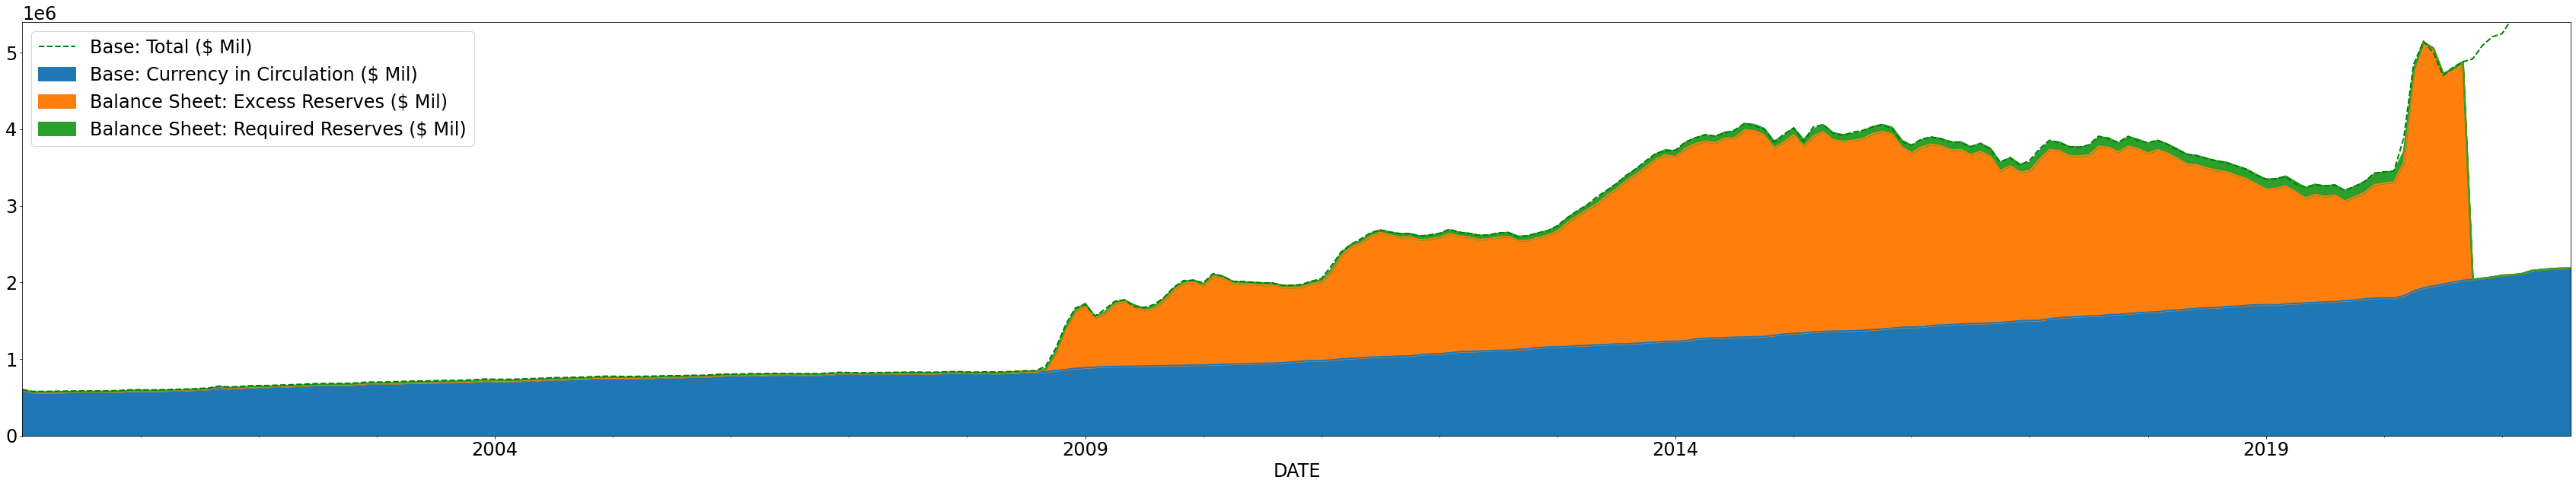

In [15]:
reserve_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Excess Reserves ($ Mil)",
             "Balance Sheet: Required Reserves ($ Mil)"]
plot_stacked_lines(data, 
                   reserve_vars, 
                   linewidth = 2,
                   total_var = "Base: Total ($ Mil)")

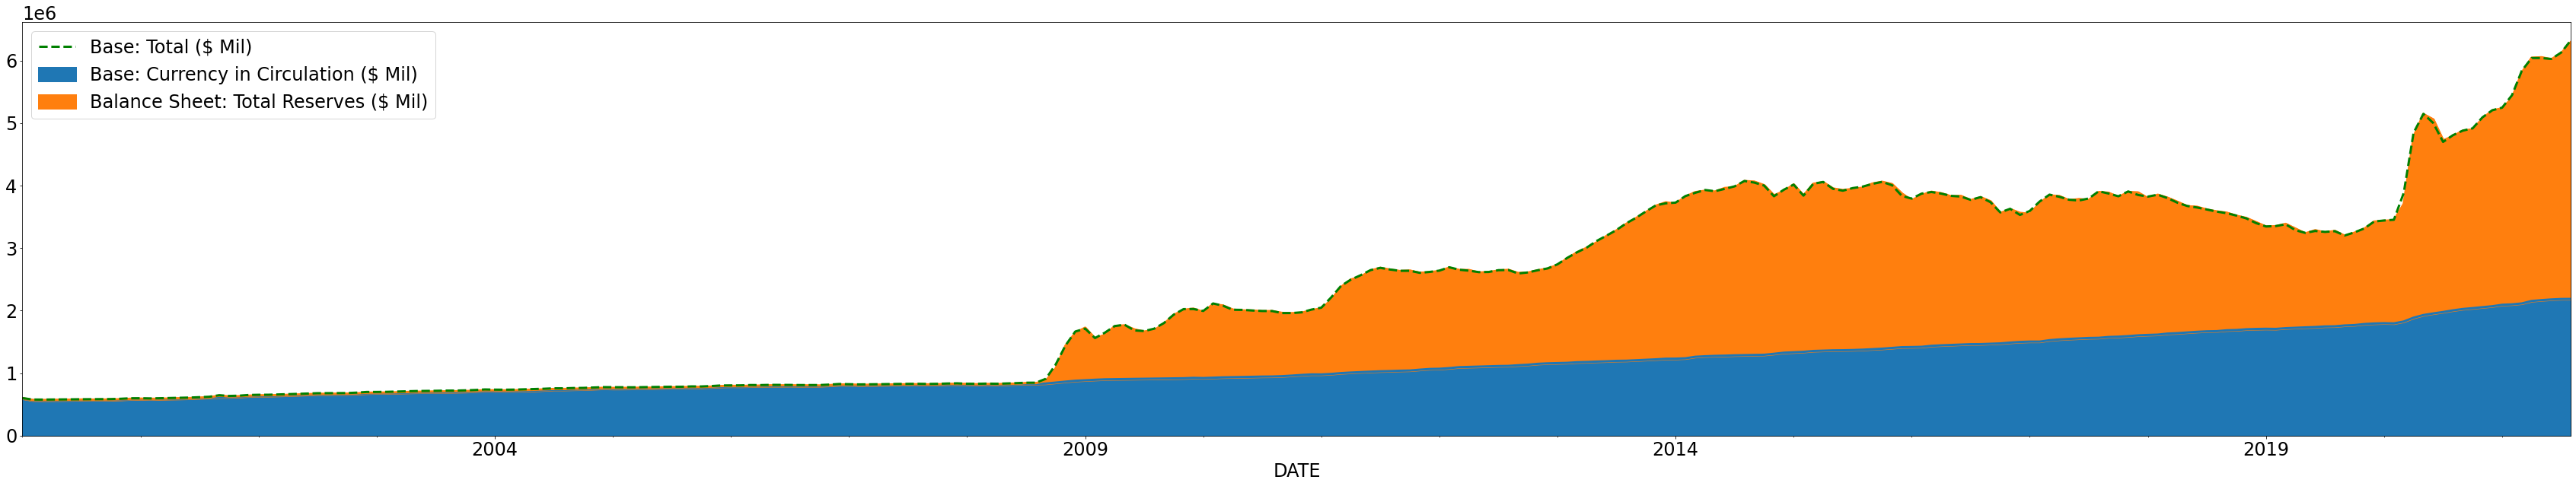

In [16]:
reserve_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Total Reserves ($ Mil)"]
plot_stacked_lines(data, reserve_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

<ipython-input-9-7887ab94efe1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


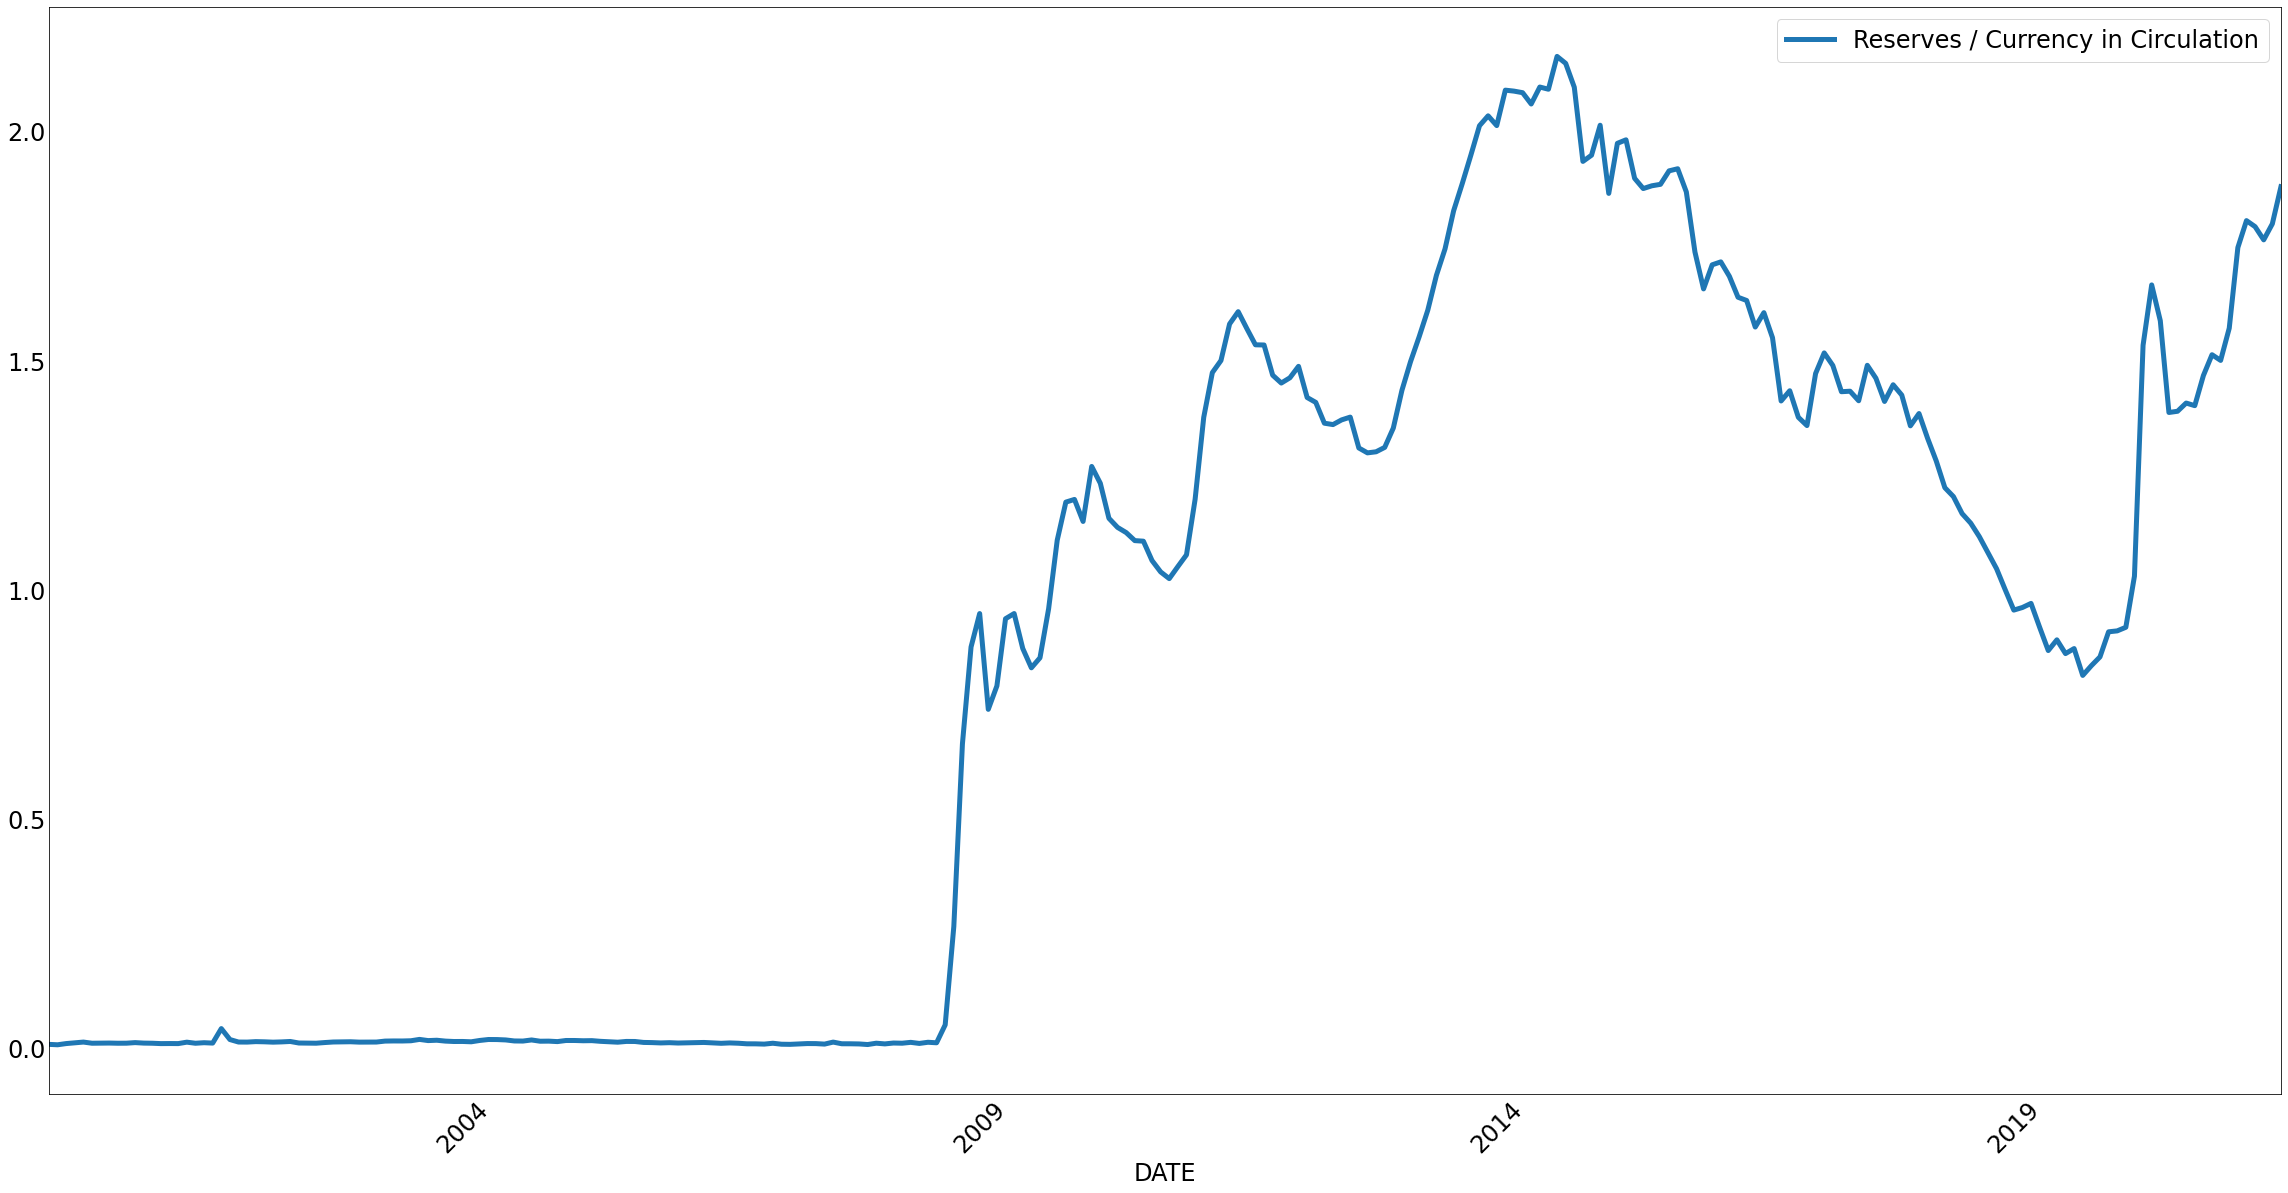

In [17]:
data["Reserves / Currency in Circulation"] = data["Balance Sheet: Total Reserves ($ Mil)"].div(
    data["Base: Currency in Circulation ($ Mil)"])

reserve_vars = ["Reserves / Currency in Circulation"]

plot_lines(data[reserve_vars], 
           linewidth = 5, 
           save_fig = False)

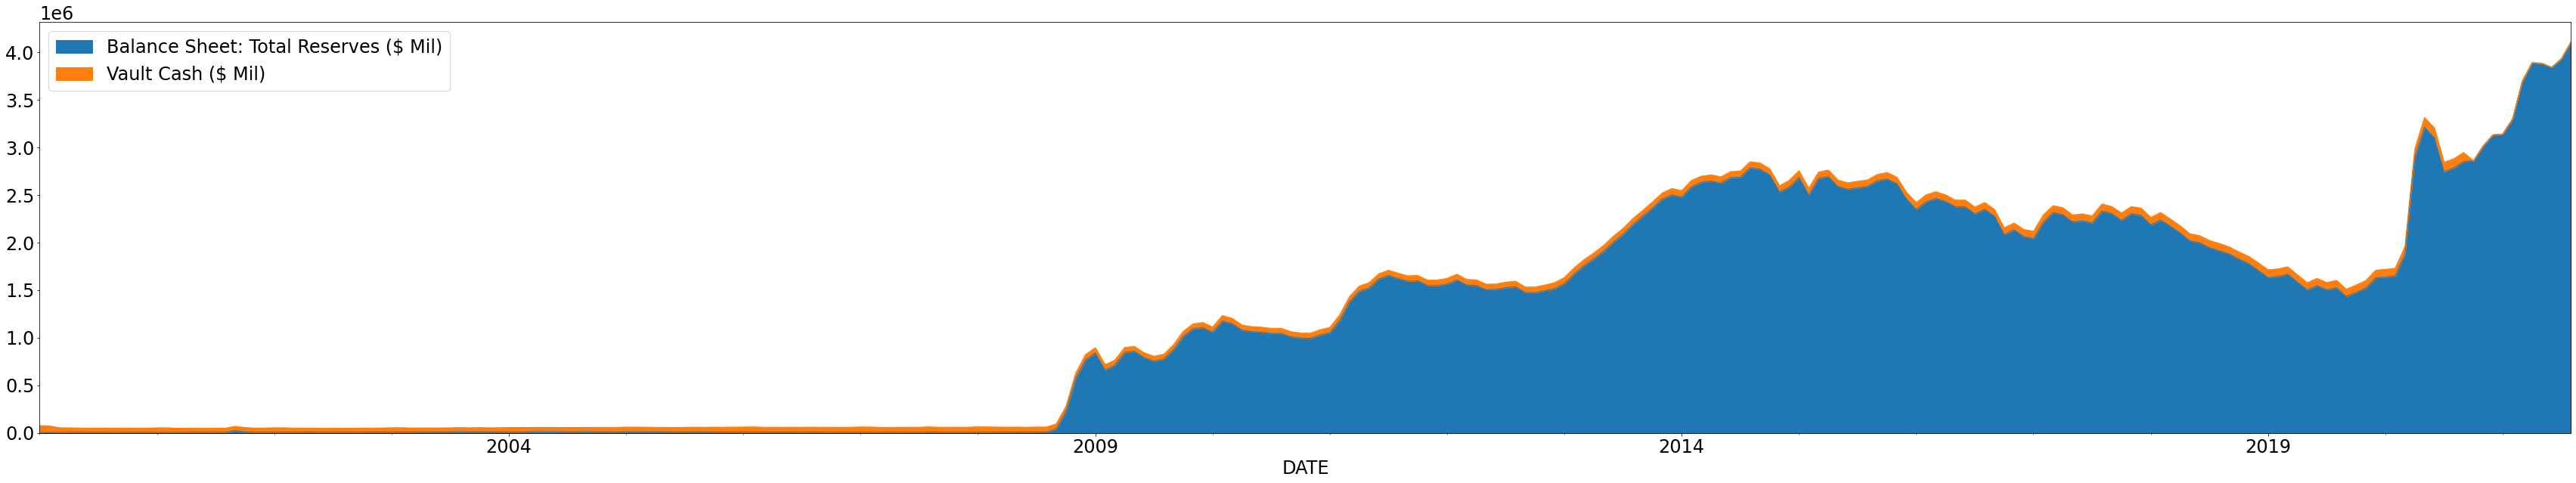

In [18]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Vault Cash ($ Mil)"]
plot_stacked_lines(data, 
                   reserve_vars)

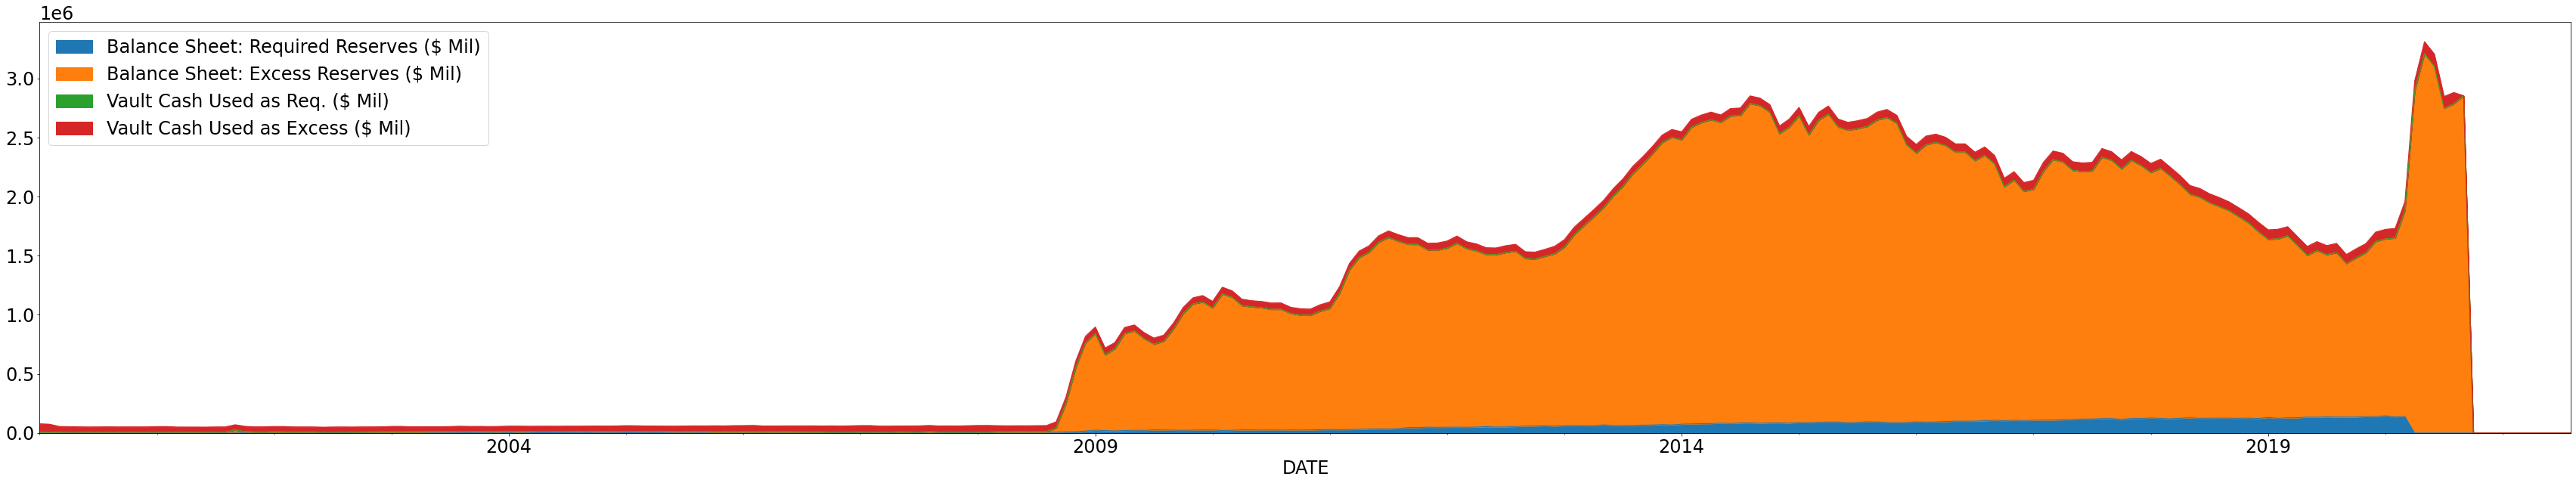

In [19]:
data["Vault Cash Used as Excess ($ Mil)"] = data["Vault Cash ($ Mil)"].sub(
    data["Vault Cash Used as Req. ($ Mil)"])

reserve_vars = ["Balance Sheet: Required Reserves ($ Mil)",
                "Balance Sheet: Excess Reserves ($ Mil)",
               "Vault Cash Used as Req. ($ Mil)",
                "Vault Cash Used as Excess ($ Mil)",]
plot_stacked_lines(data,
                   reserve_vars)

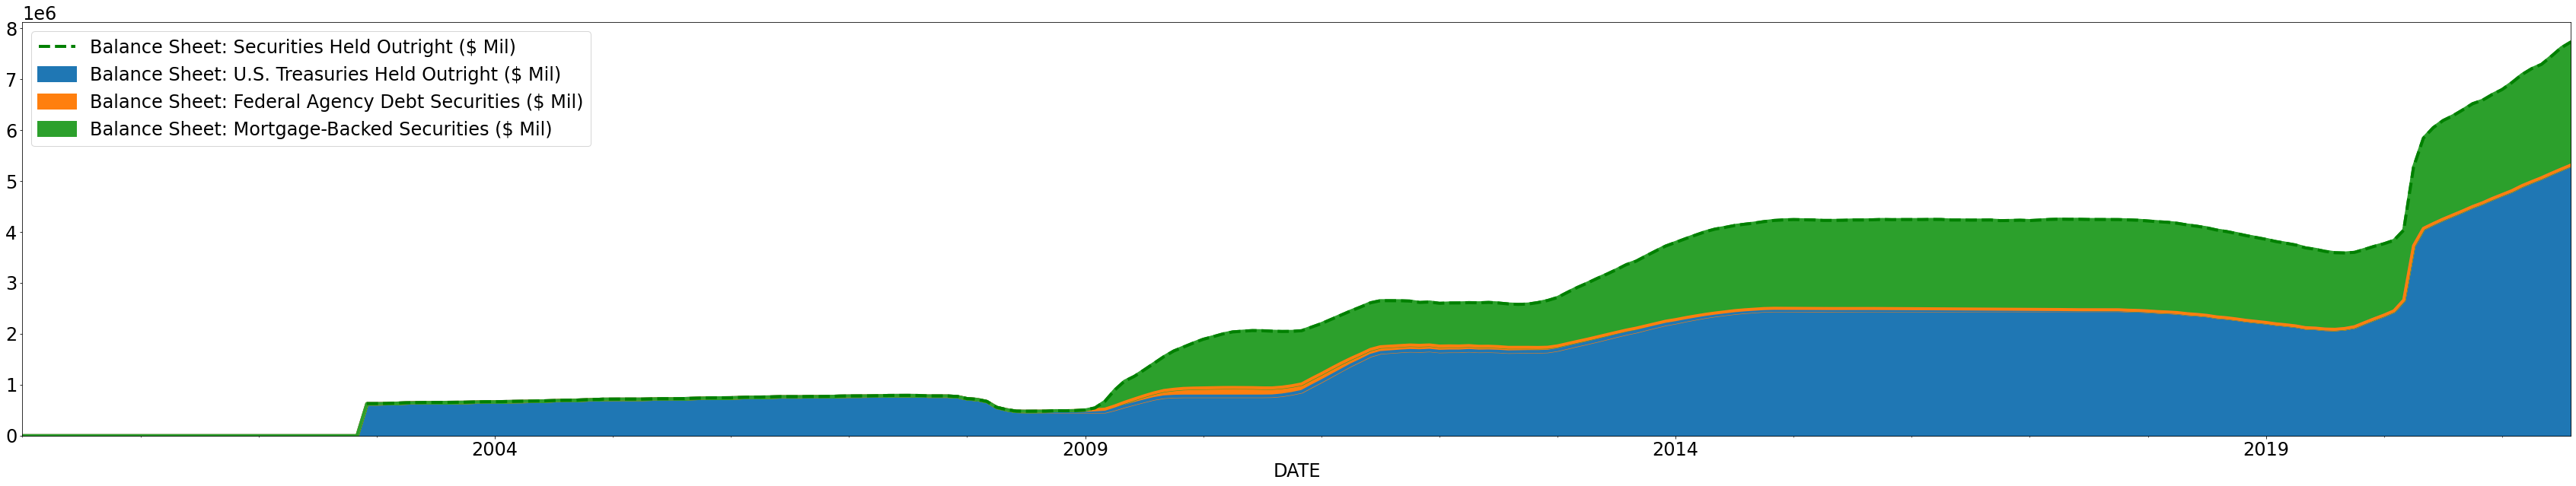

In [20]:
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]

plot_stacked_lines(data, 
                   account_vars, 
                   linewidth = 4, 
                   total_var = "Balance Sheet: Securities Held Outright ($ Mil)")

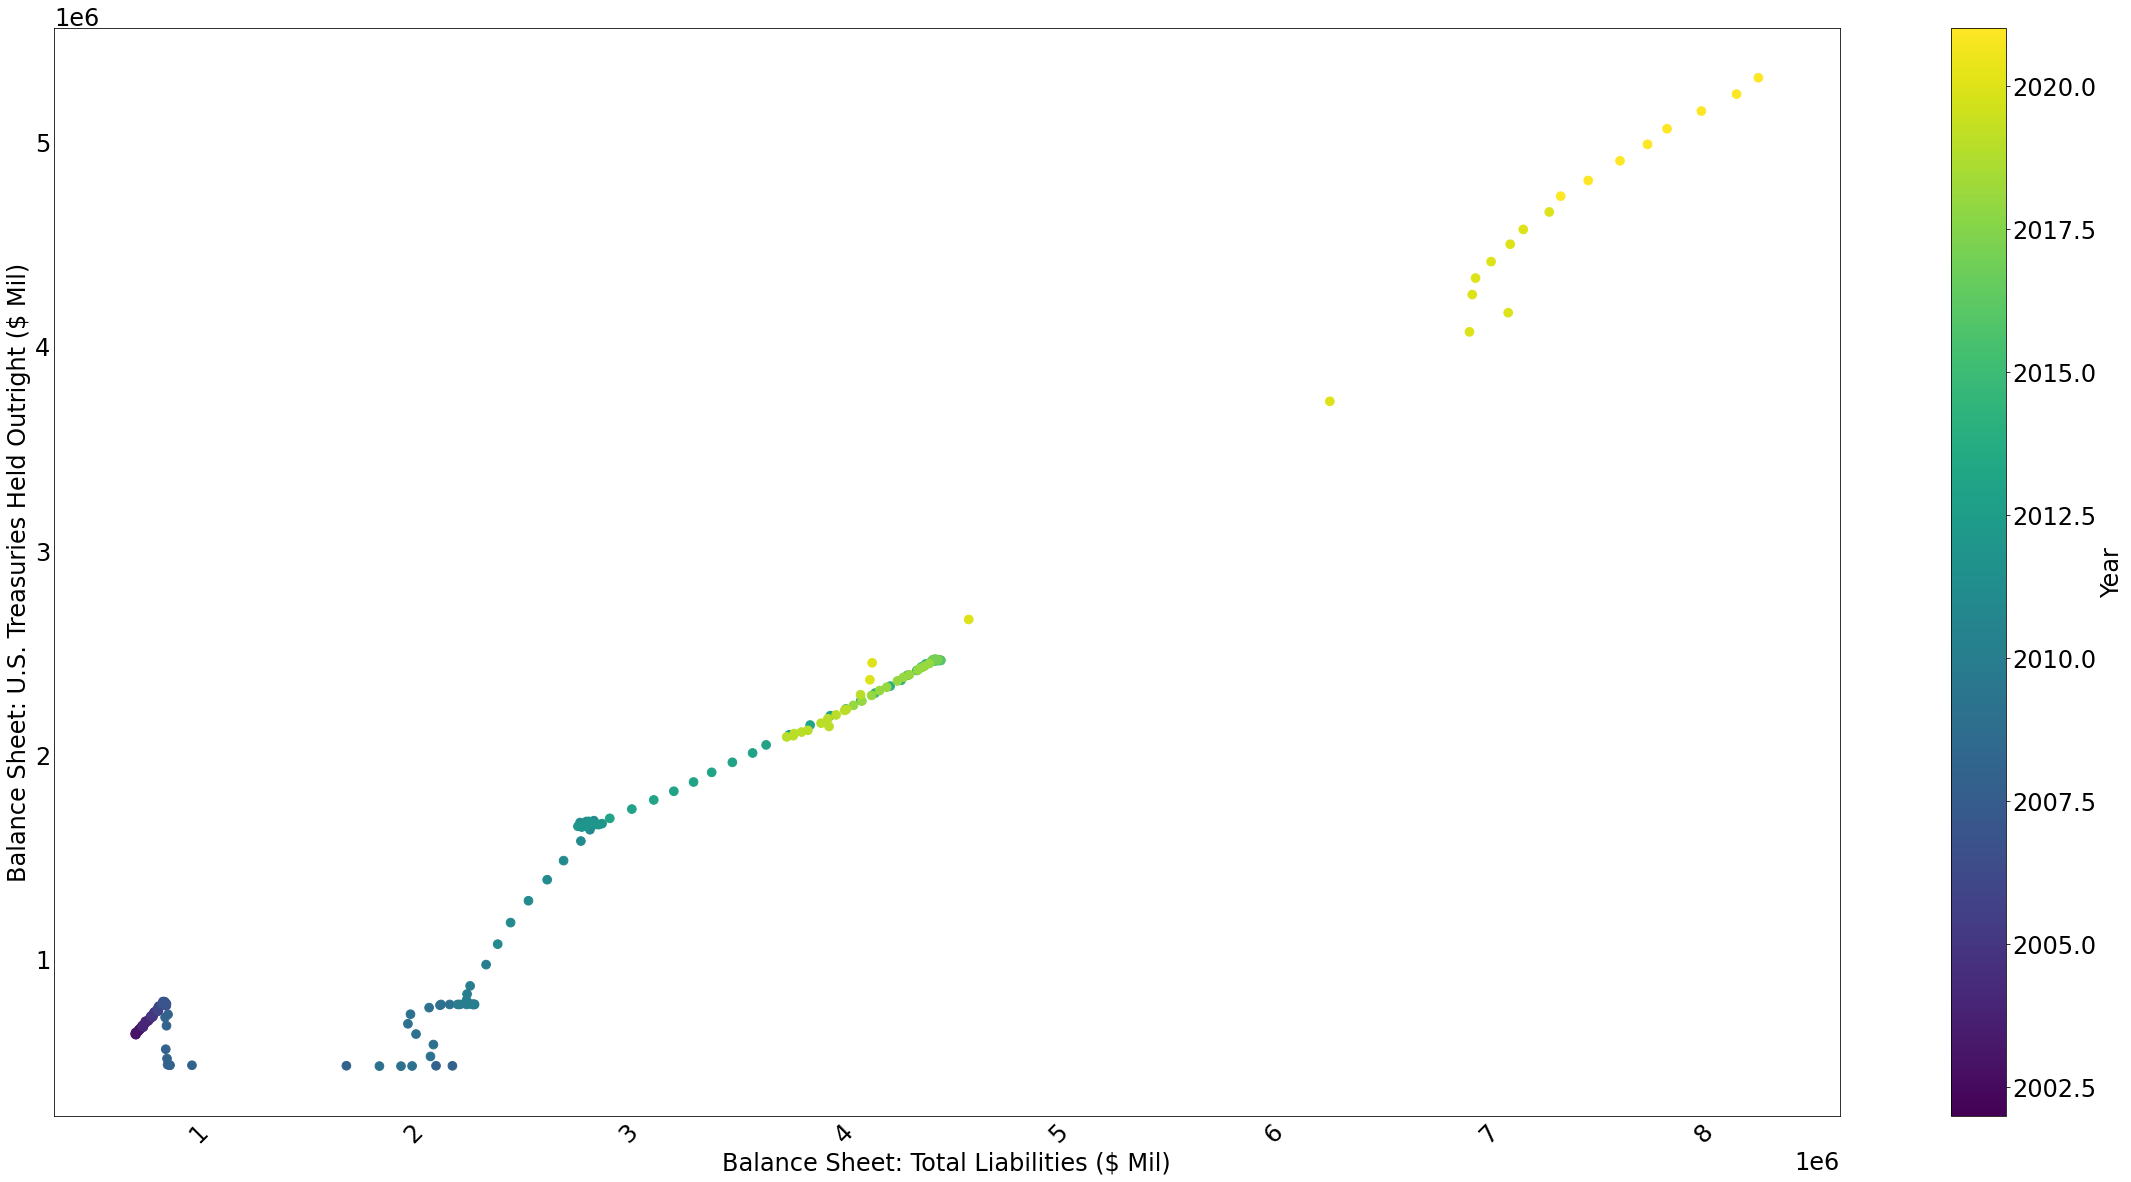

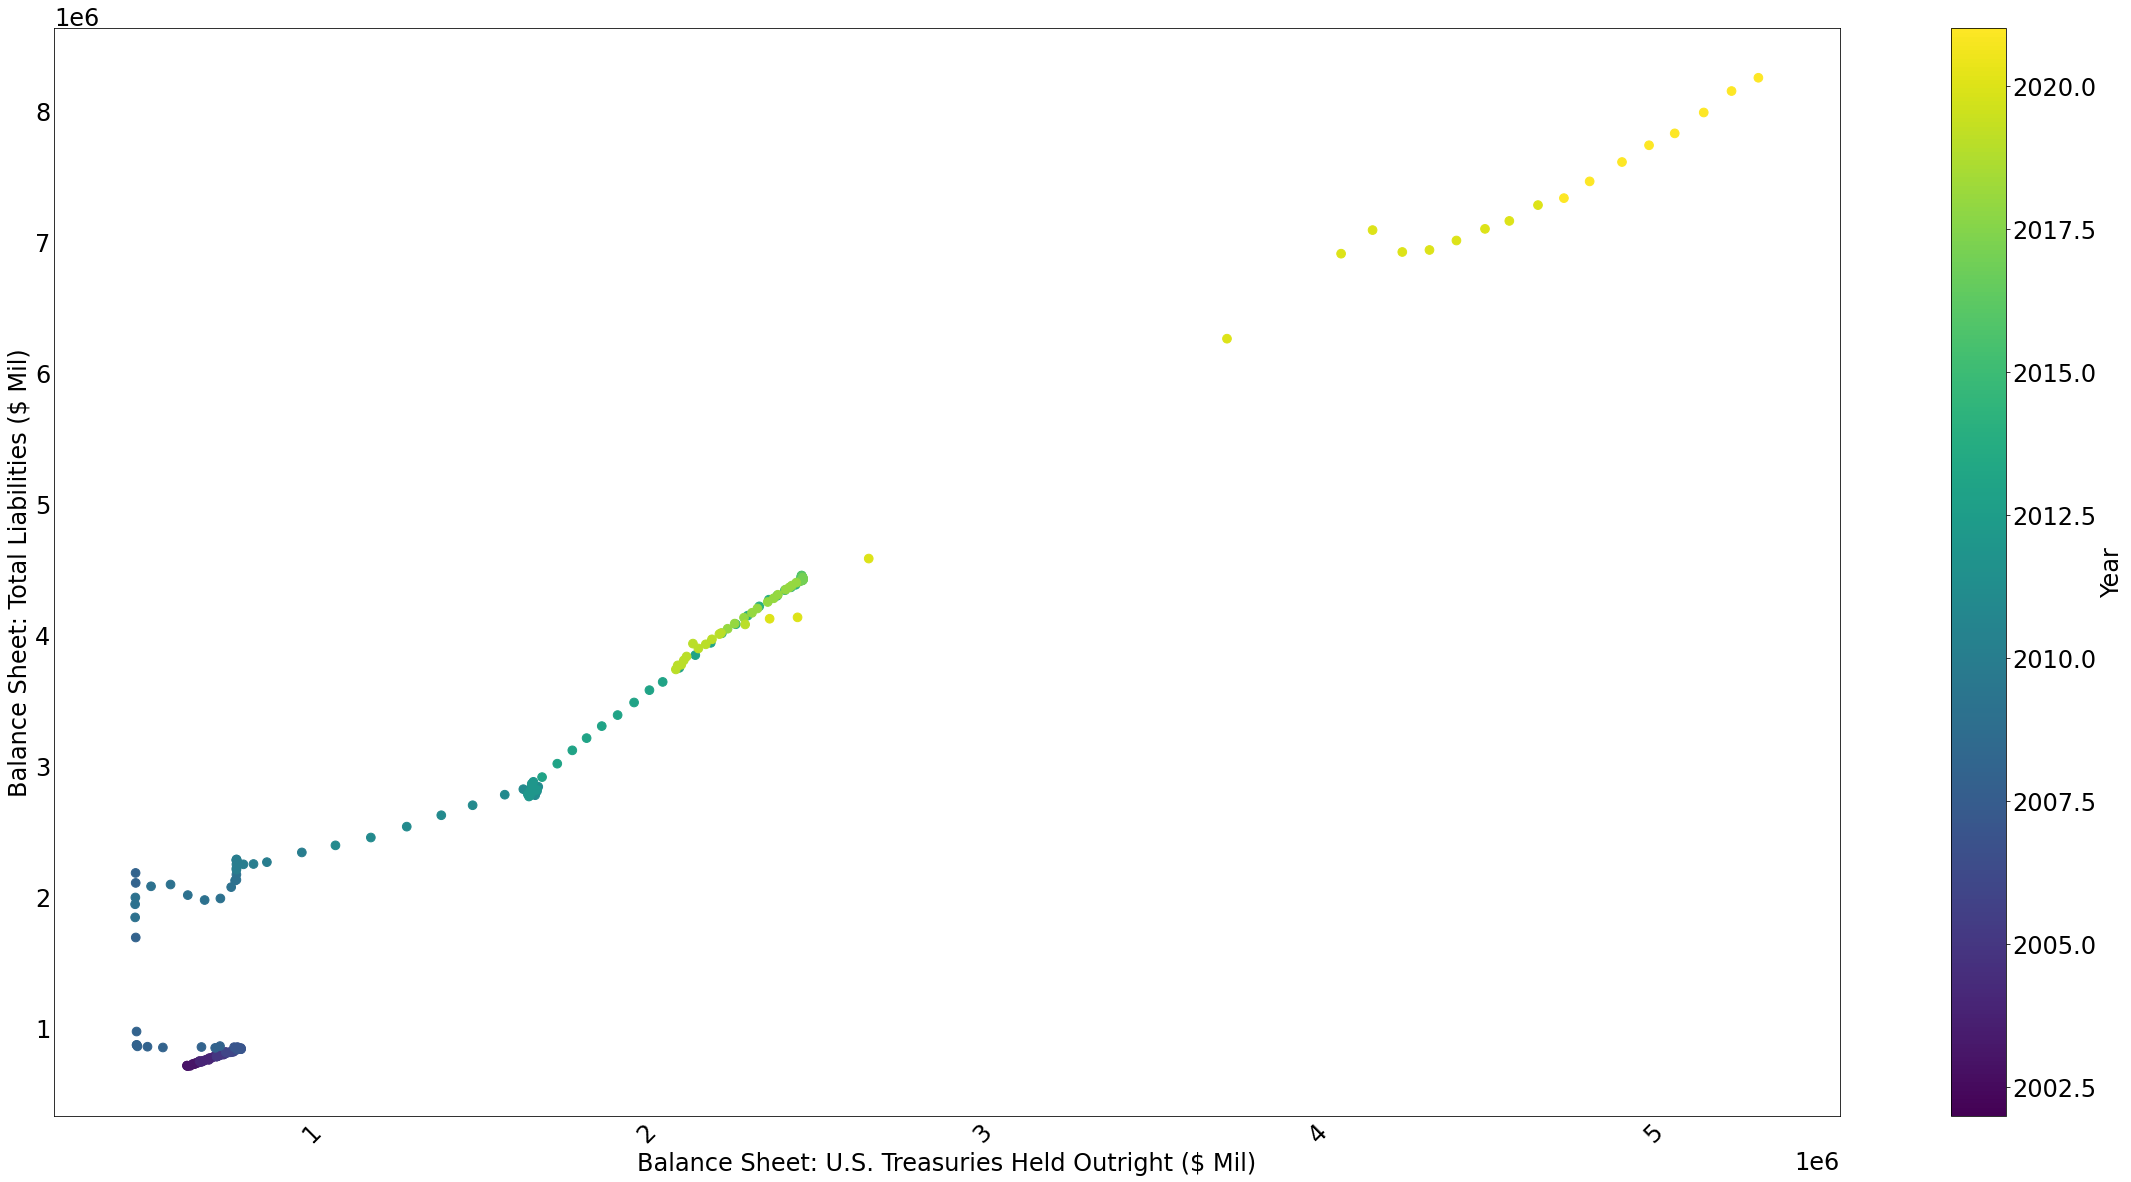

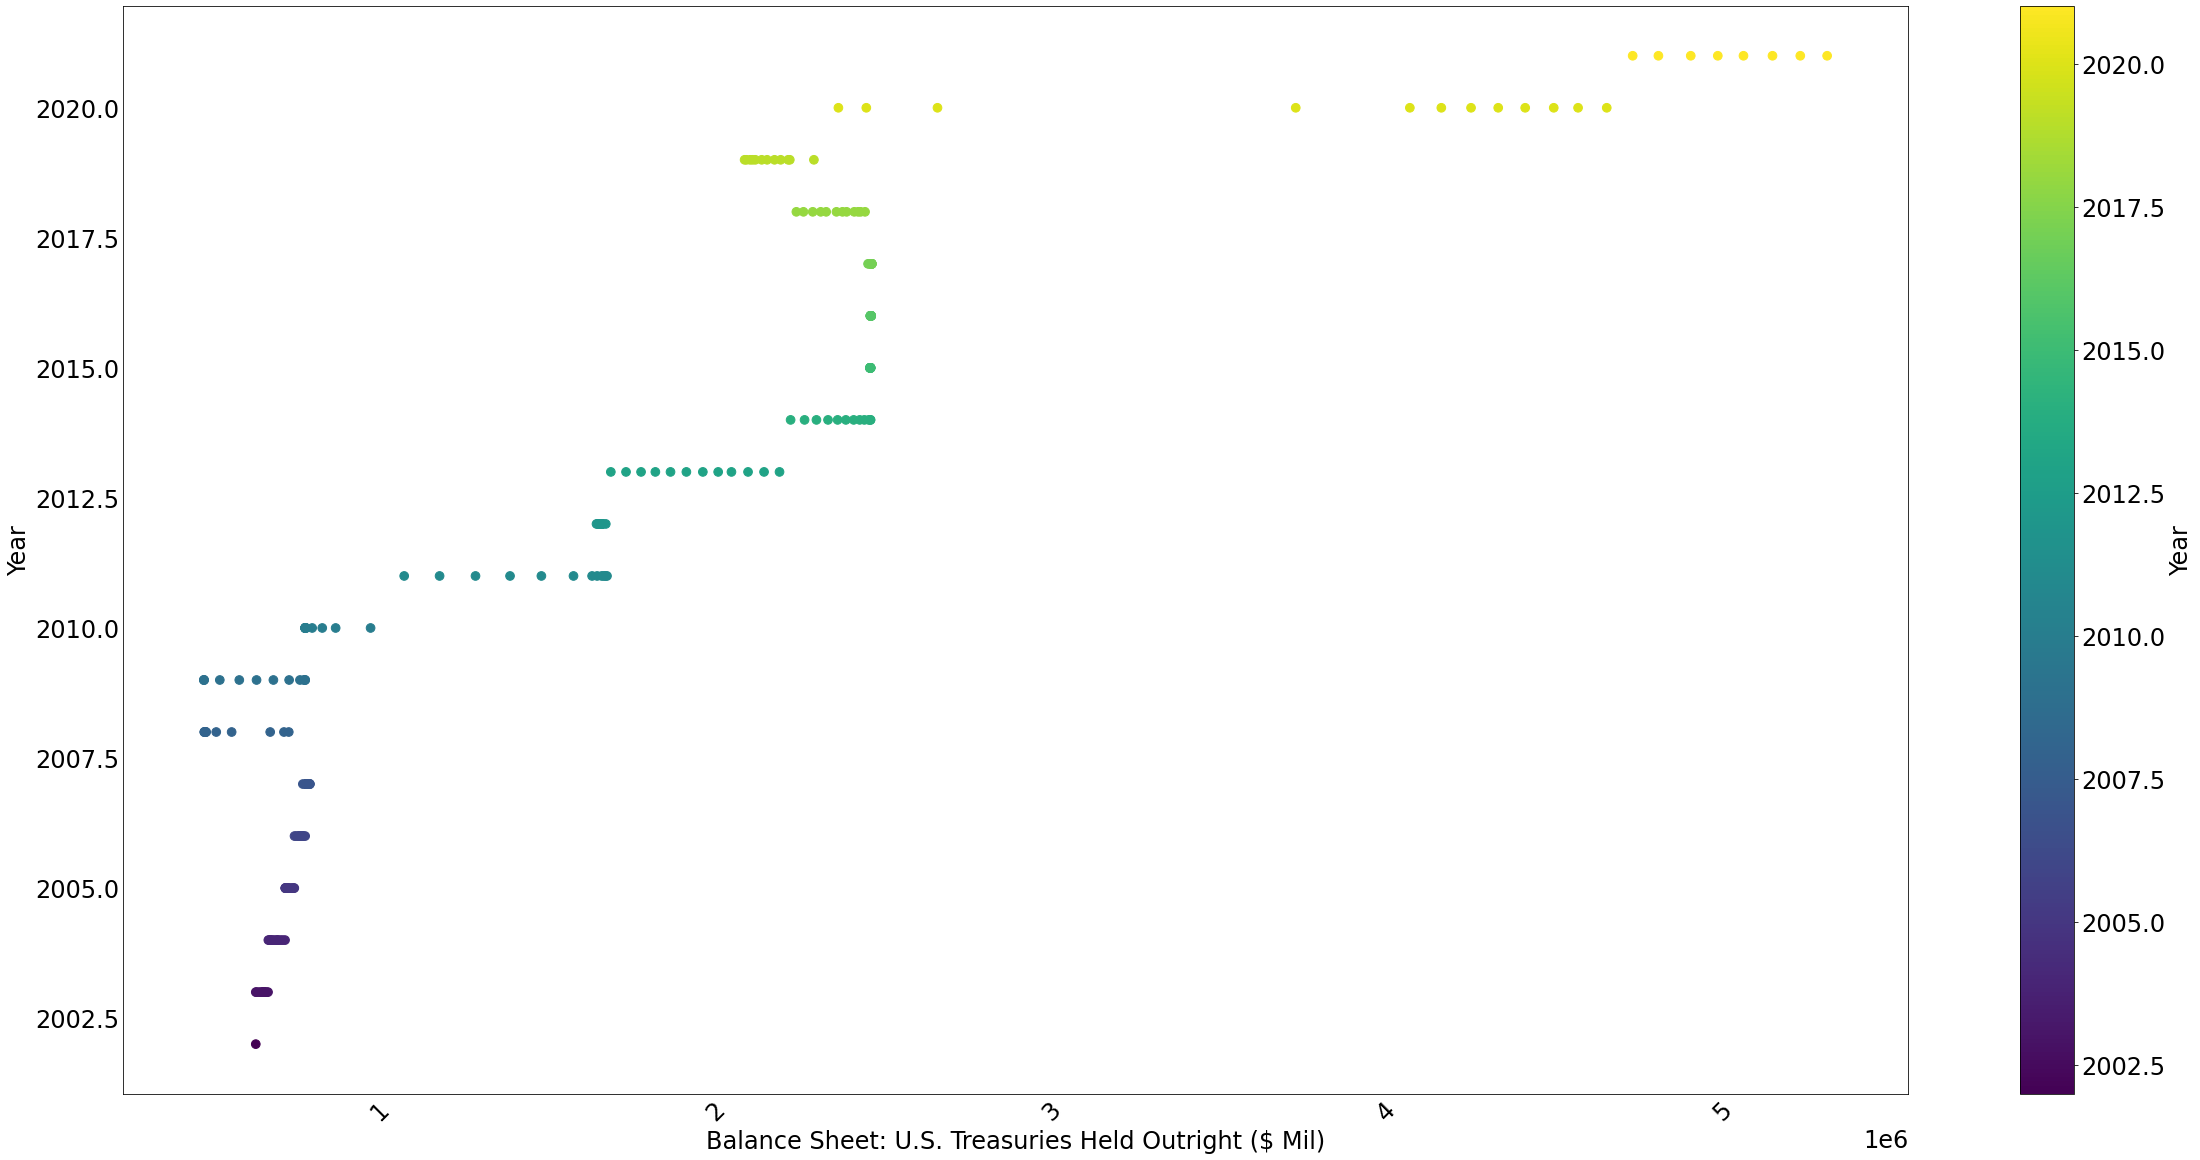

In [21]:
scatter_vars = ["Balance Sheet: Total Liabilities ($ Mil)",
                "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)"]
plot_ts_scatter(data[scatter_vars])

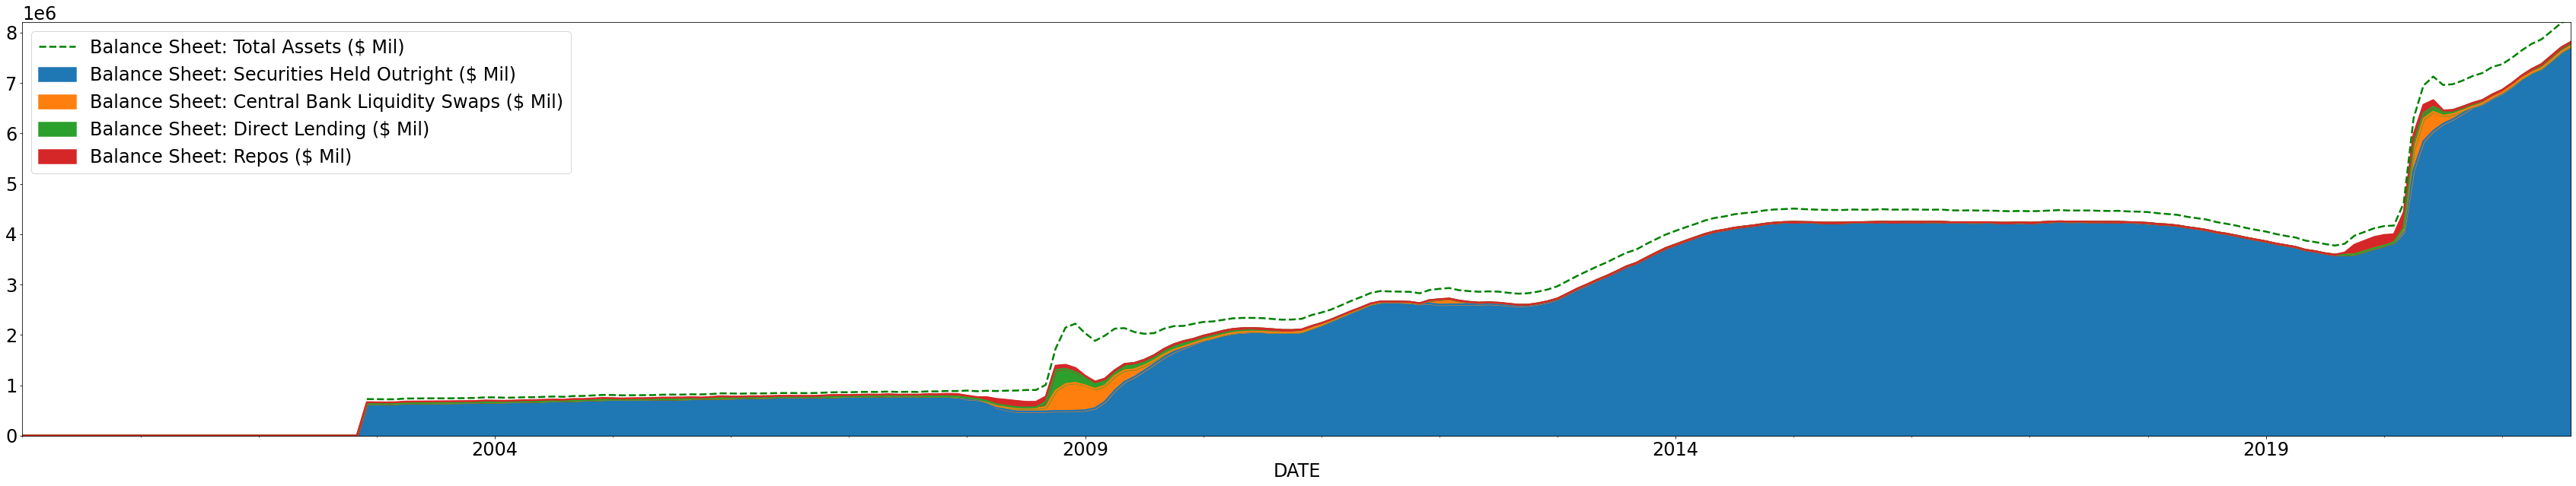

In [22]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)"]

plot_stacked_lines(data,
                   account_vars, 
                   linewidth = 2.5, 
                   total_var = "Balance Sheet: Total Assets ($ Mil)")

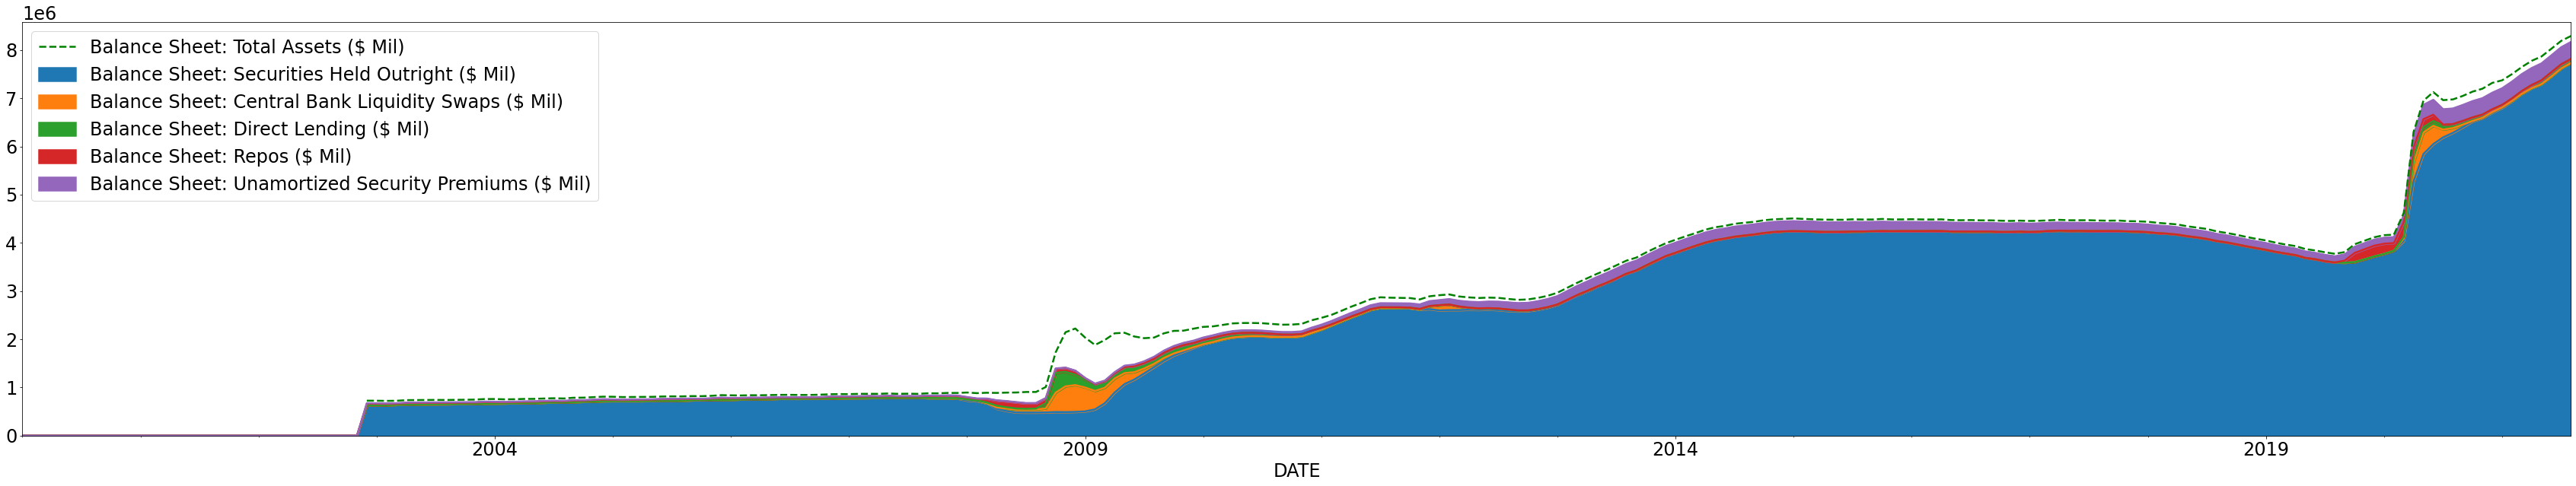

In [23]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]

plot_stacked_lines(data, 
                   account_vars,
                   linewidth = 2.5, 
                   total_var = "Balance Sheet: Total Assets ($ Mil)")

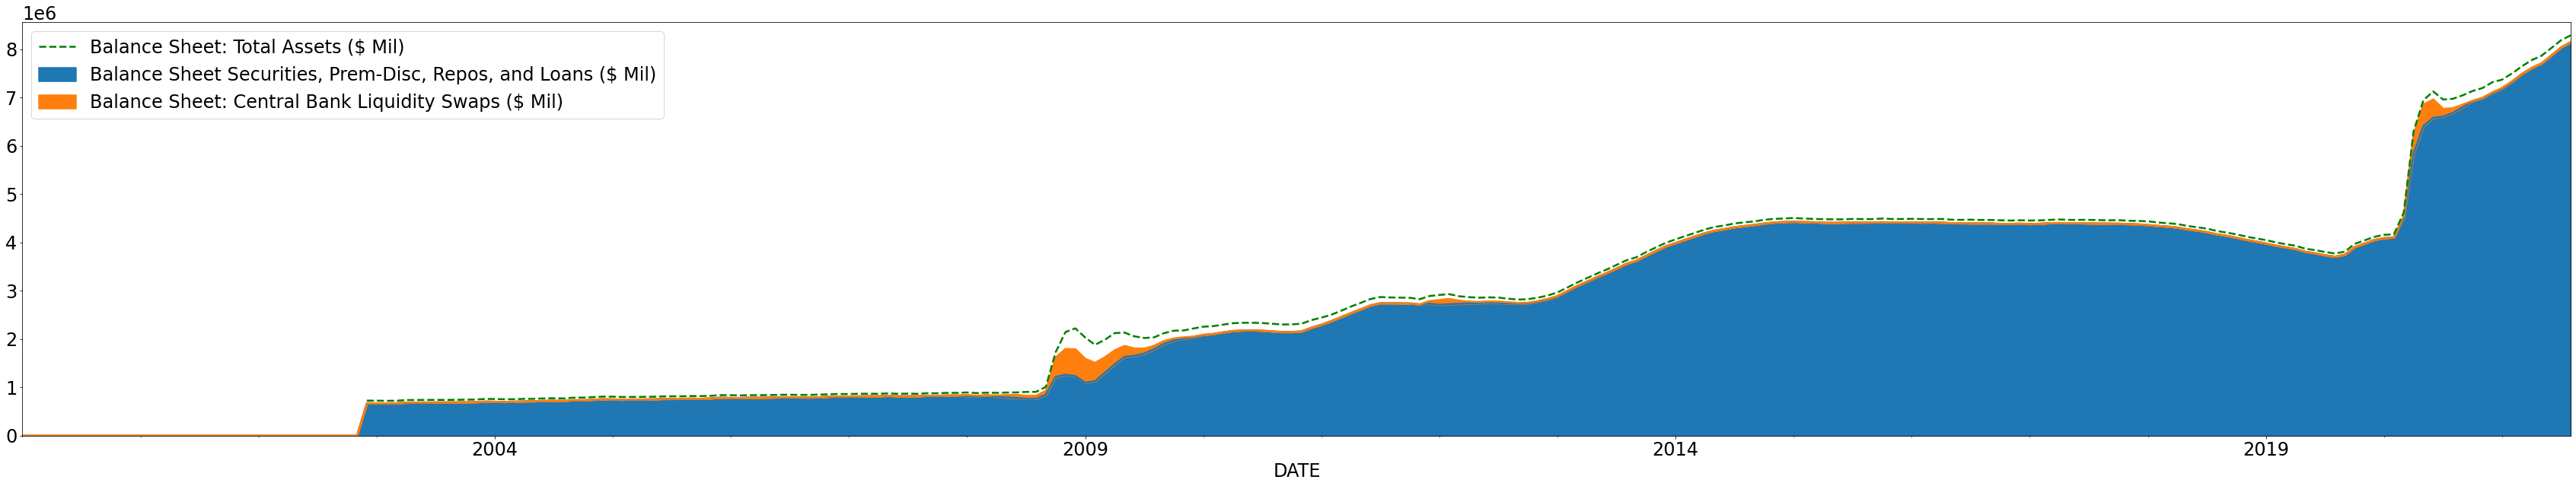

In [24]:
account_vars = ["Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",
                "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)"]

plot_stacked_lines(data, 
                   account_vars,
                   linewidth = 2.5, 
                   total_var = "Balance Sheet: Total Assets ($ Mil)")

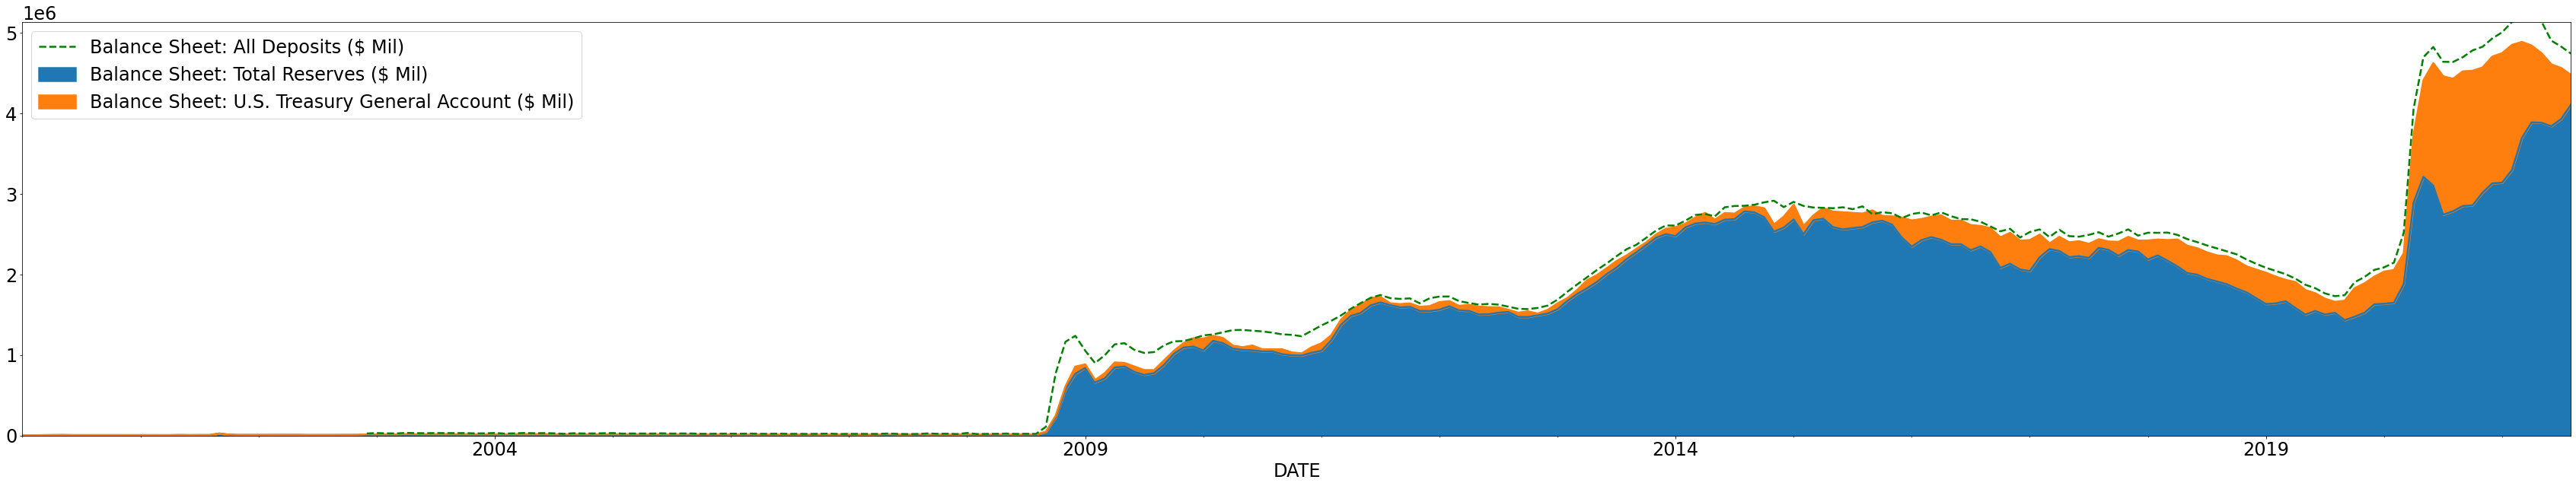

In [25]:
account_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(data, 
                   account_vars, 
                   linewidth = 2.5,
                   total_var = "Balance Sheet: All Deposits ($ Mil)")

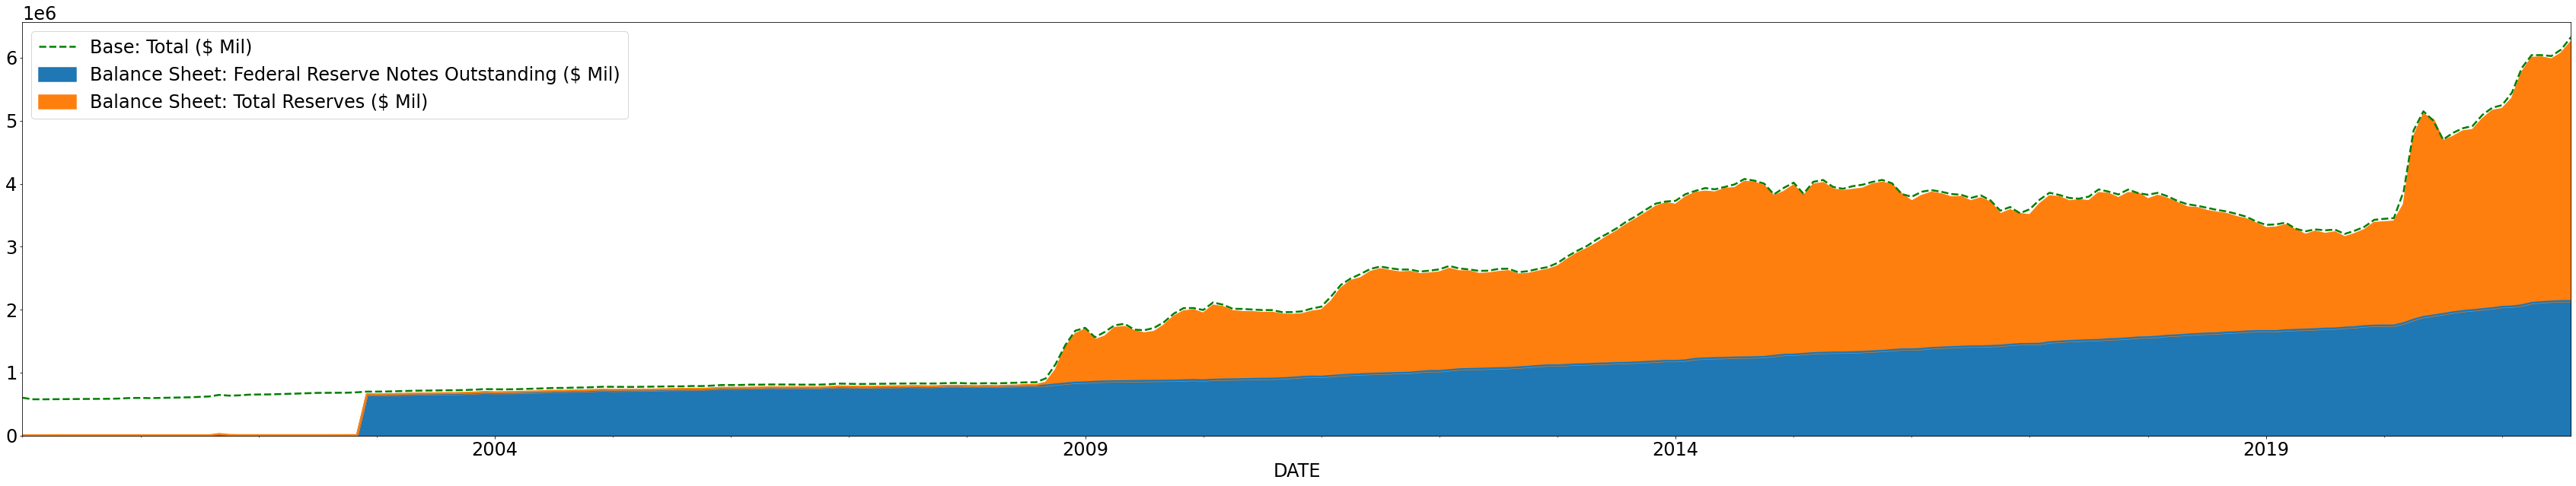

In [26]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]

plot_stacked_lines(data,
                   account_vars,
                   linewidth = 2.5,
                   total_var = "Base: Total ($ Mil)")

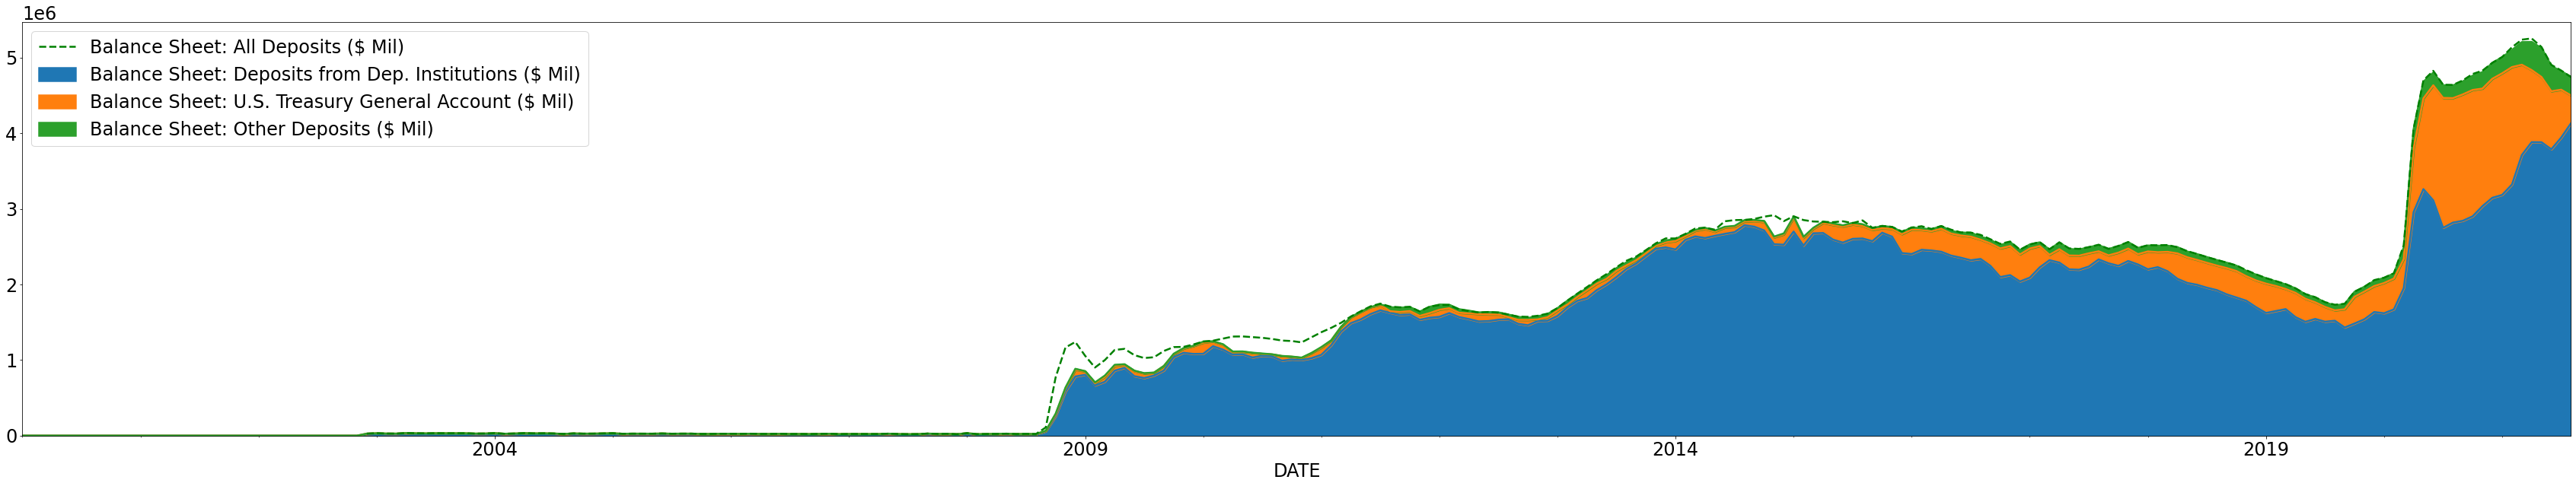

In [27]:
account_vars = ["Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)",
                "Balance Sheet: Other Deposits ($ Mil)"]

plot_stacked_lines(data, 
                   account_vars,
                   linewidth = 2.5,
                   total_var = "Balance Sheet: All Deposits ($ Mil)")

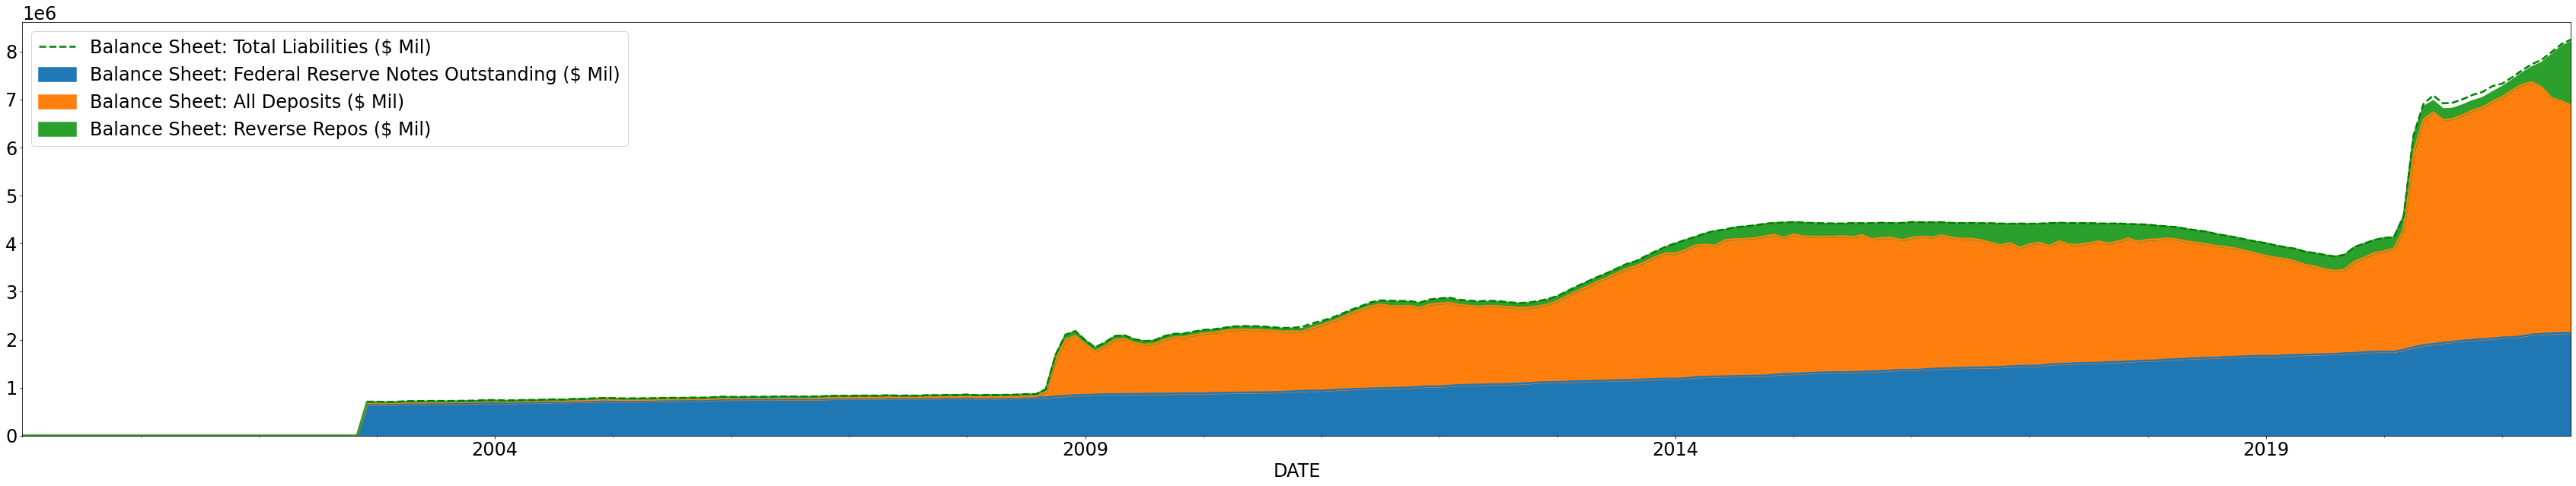

In [28]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]

plot_stacked_lines(data, 
                   account_vars, 
                   linewidth = 2.5,
                   total_var = "Balance Sheet: Total Liabilities ($ Mil)")

<ipython-input-9-7887ab94efe1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


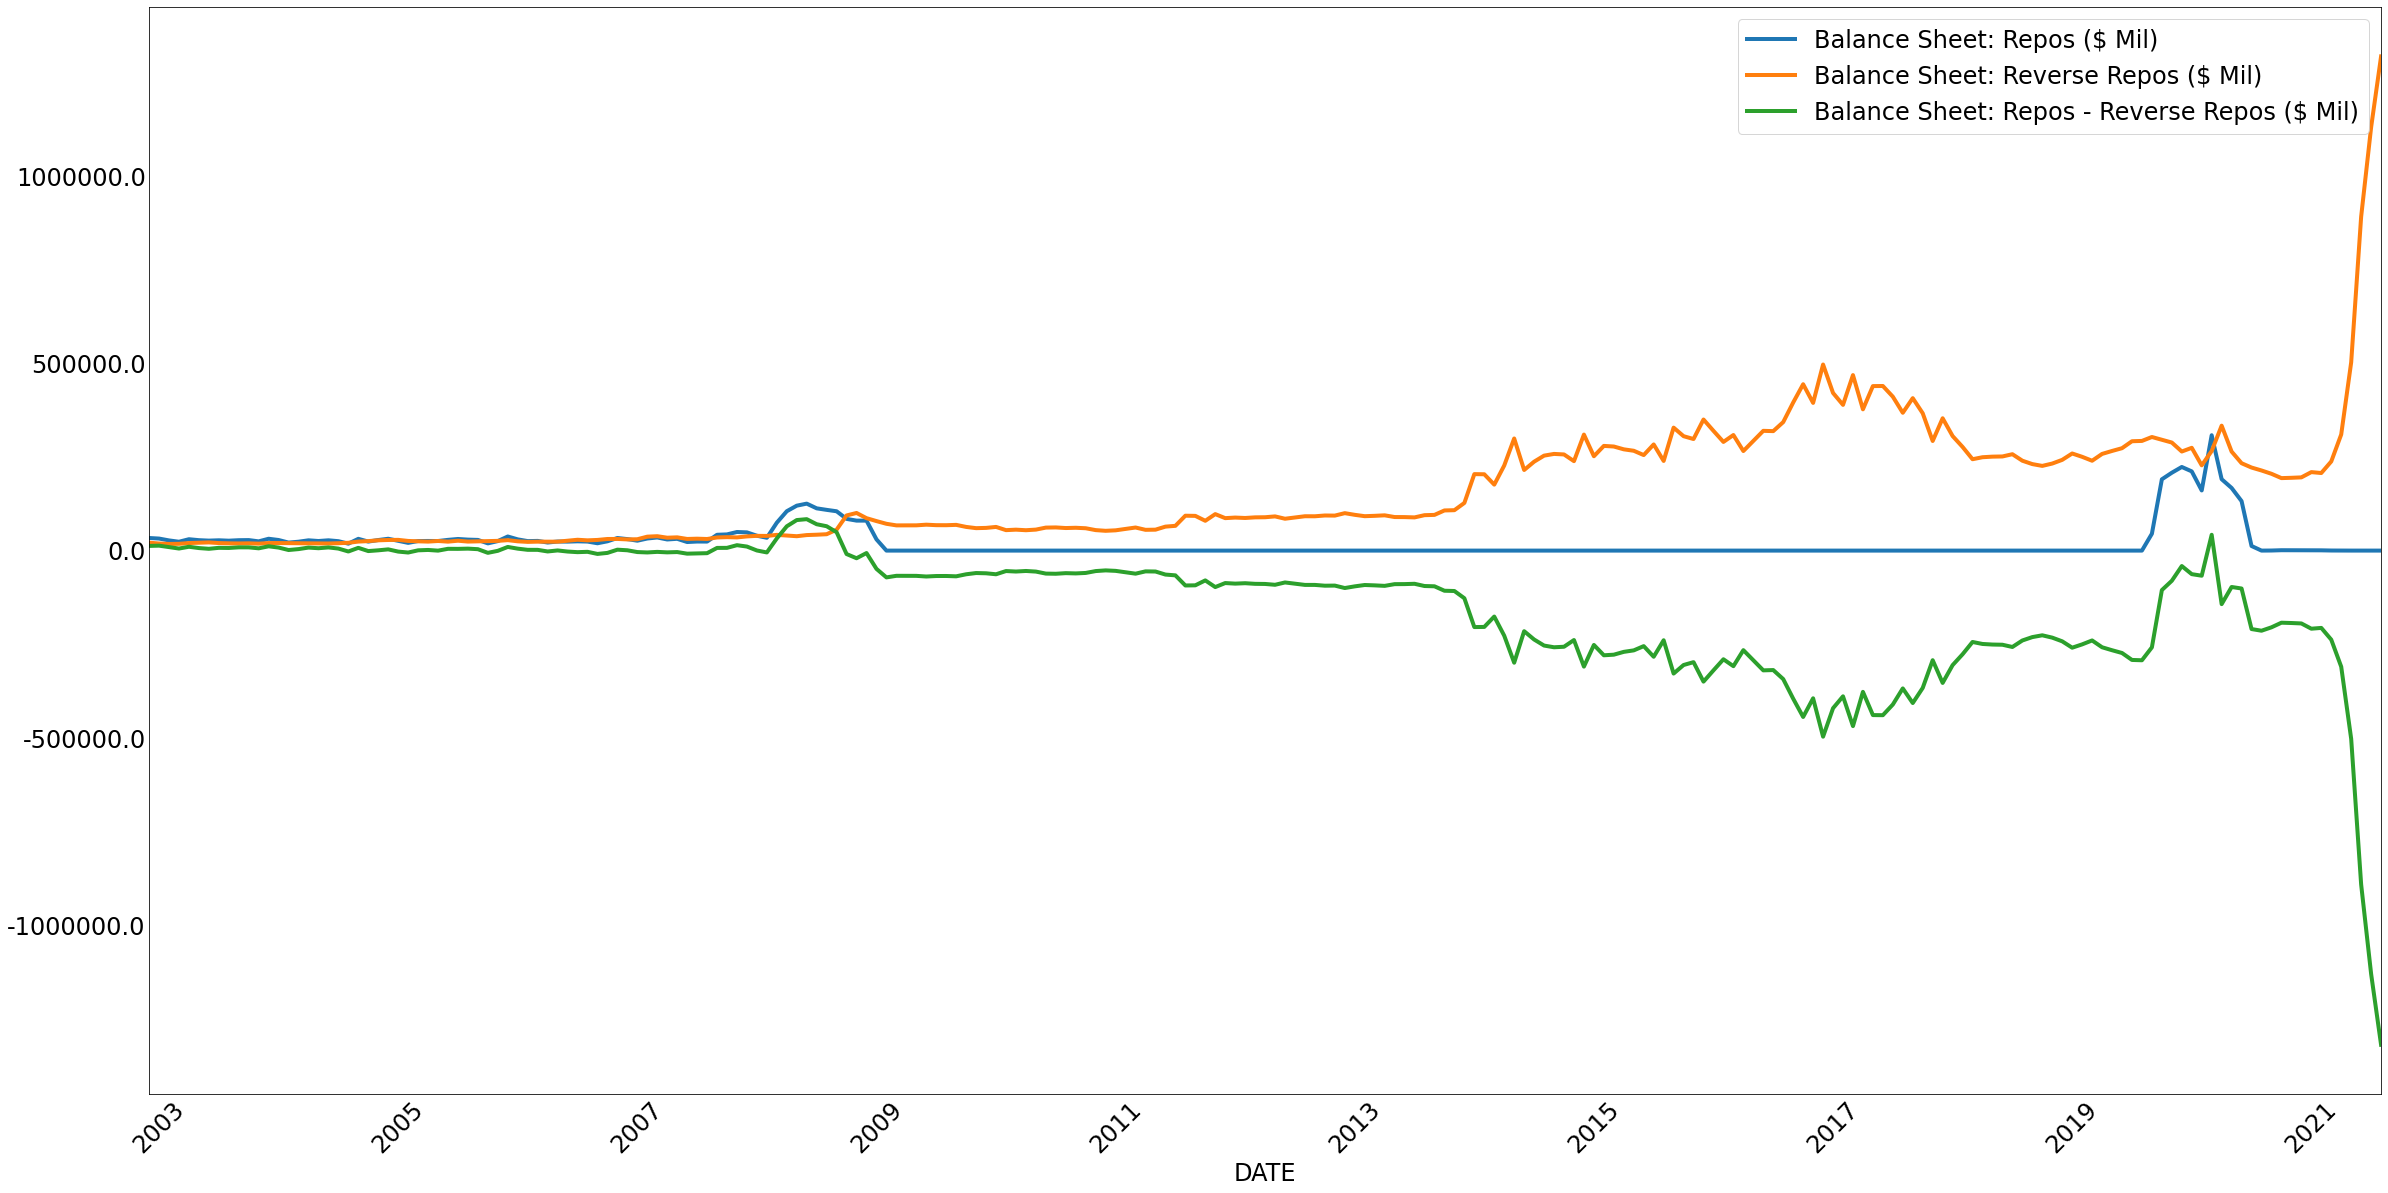

In [29]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])
overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                  "Balance Sheet: Repos - Reverse Repos ($ Mil)"]

plot_lines(data[overnight_vars], linewidth = 4)
data[overnight_vars].to_csv("repoMarket.csv")

<ipython-input-9-7887ab94efe1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


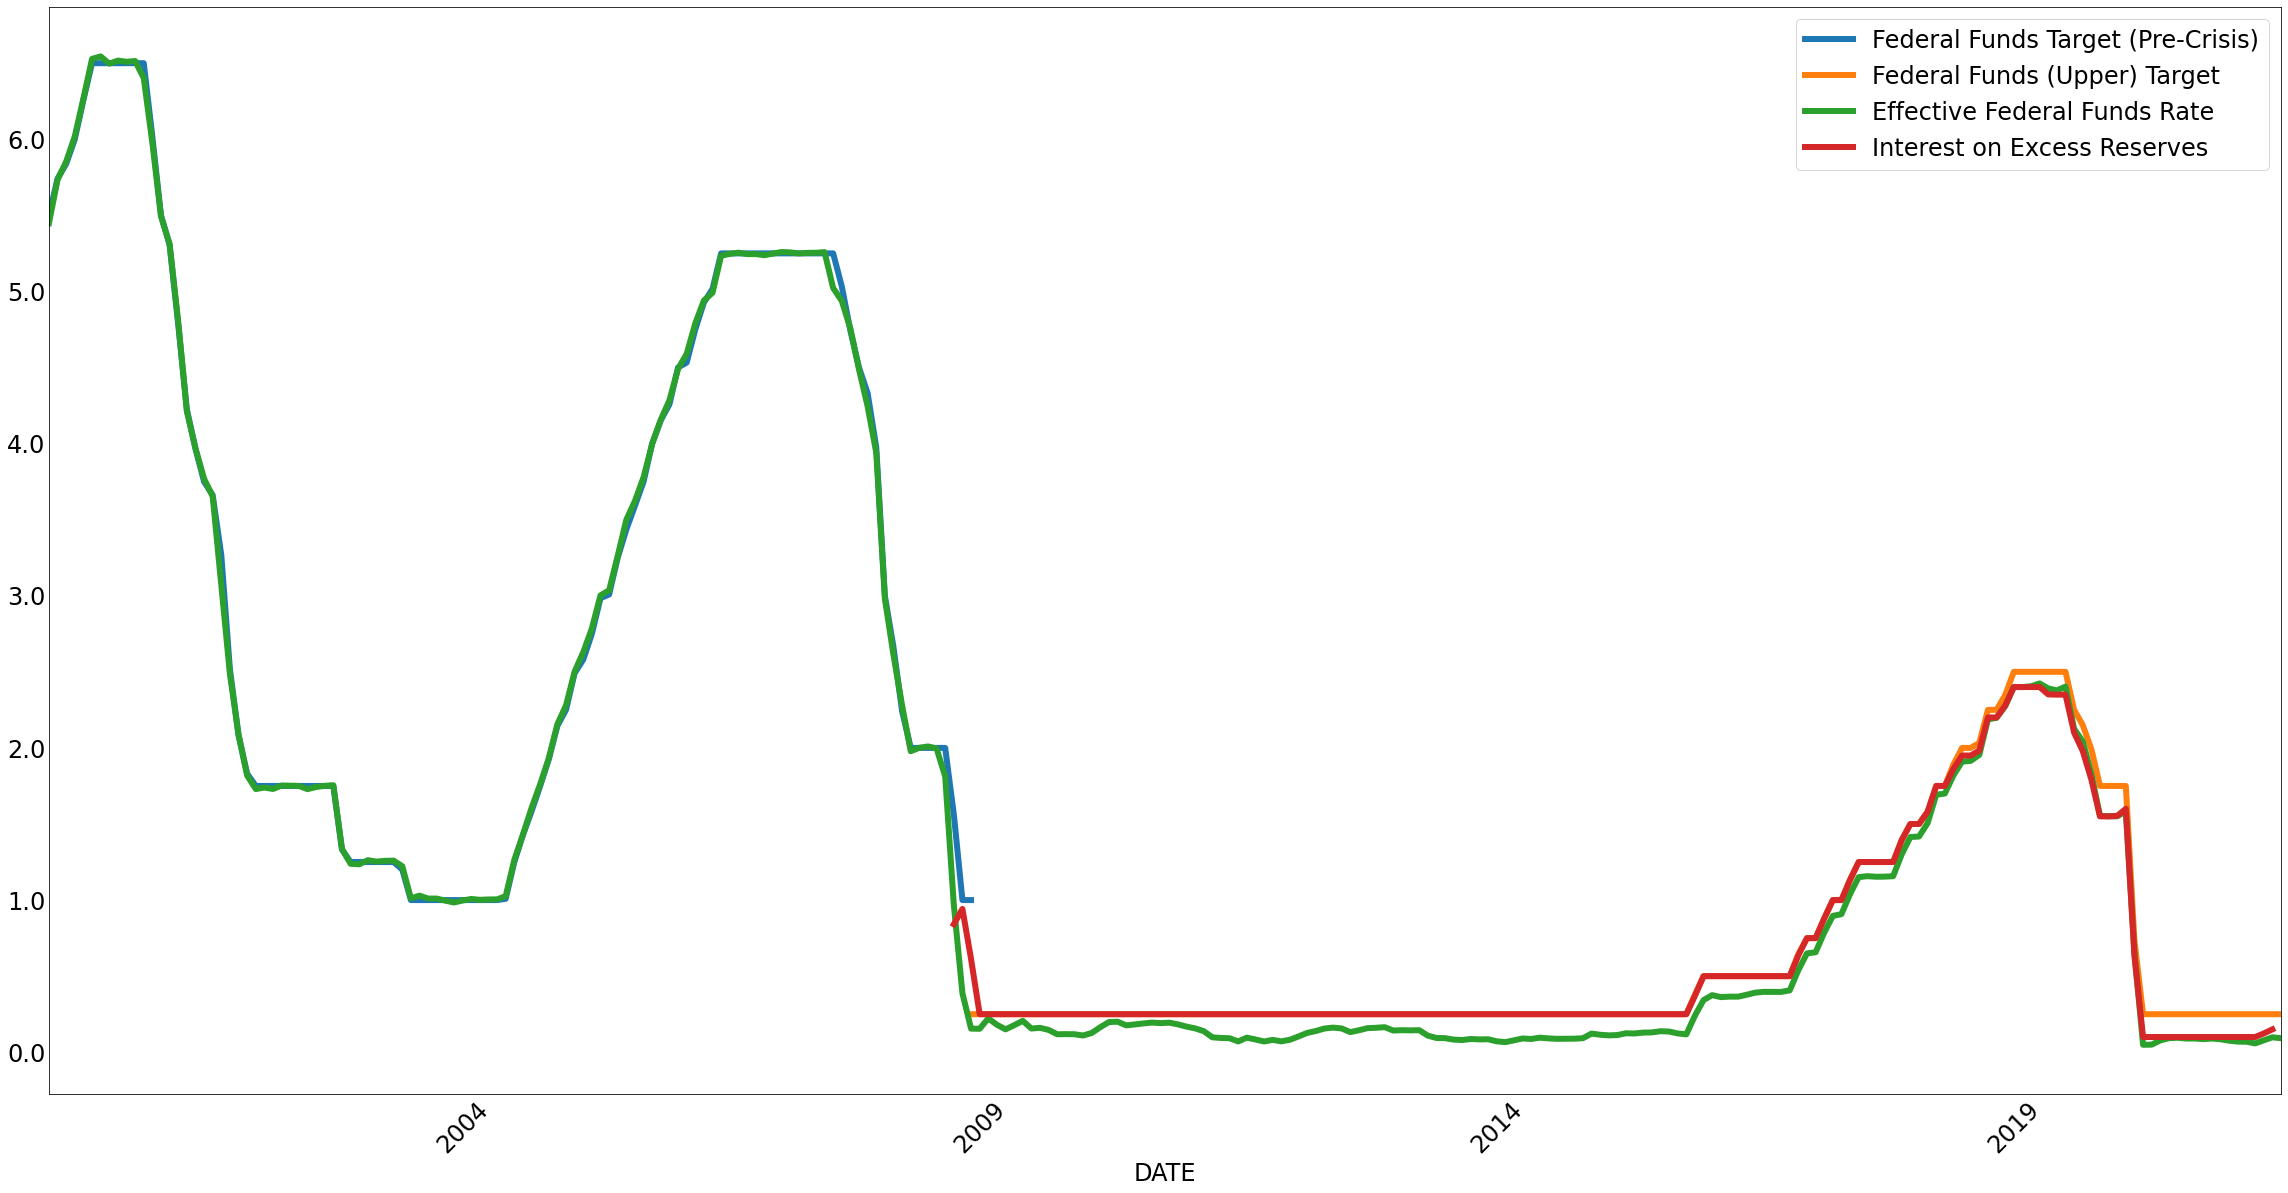

In [30]:
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                  "Federal Funds (Upper) Target",
                  "Effective Federal Funds Rate",
                  "Interest on Excess Reserves"]
plot_lines(data[interest_vars], 
           linewidth = 6)

<AxesSubplot:xlabel='DATE'>

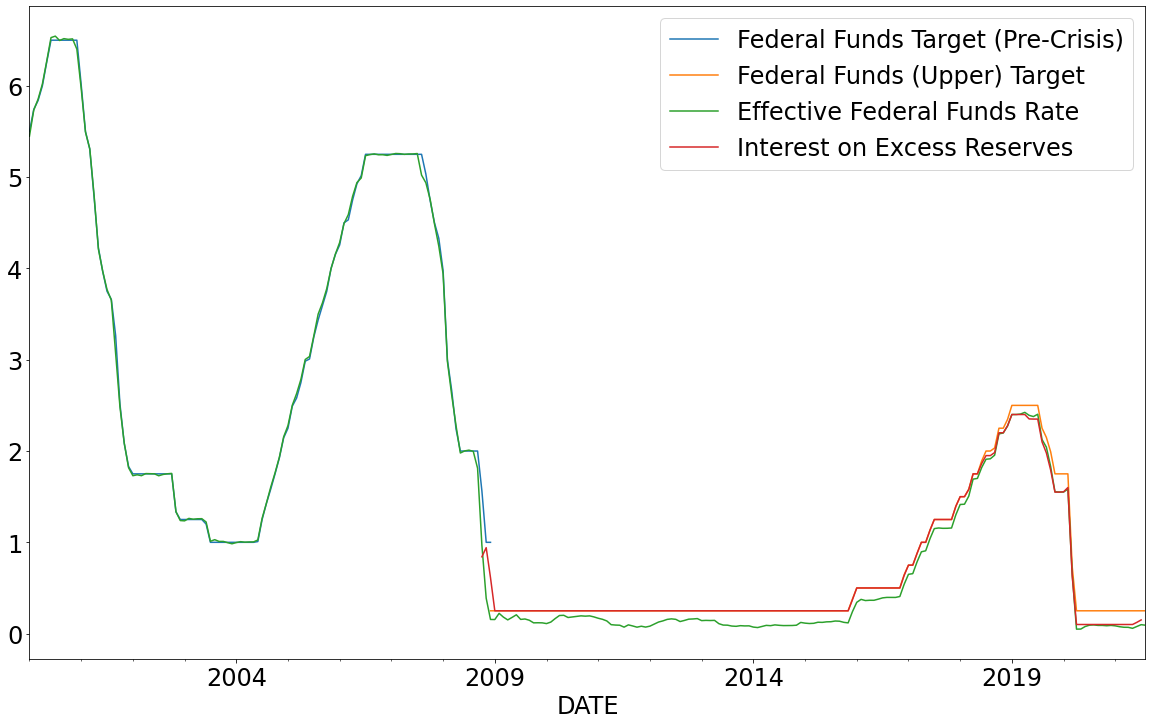

In [31]:
fig, ax = plt.subplots(figsize = (20,12))
data[interest_vars].plot(ax= ax)